<a href="https://colab.research.google.com/github/karmanandan/karma_nandan.github.io/blob/master/Coursera_Prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coursera--Intro

Vectorization

In [ ]:
# Vectorization is used to instead of multiple for loops.
# Multiple For loops given low performance.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
w = np.random.rand(1000000)
x = np.random.rand(1000000)

In [ ]:
%%time
z=0
for i in range(len(w)):
  z+=w[i]*x[i]
print(z)

250140.5042591061
CPU times: user 728 ms, sys: 0 ns, total: 728 ms
Wall time: 908 ms


In [ ]:
%%time
np.dot(w,x)

CPU times: user 10.7 ms, sys: 0 ns, total: 10.7 ms
Wall time: 10 ms


250140.50425911375

In [ ]:
aa = np.array([[56.0,0.0,4.4,68],[1.2,104.0,52.0,8.0],[1.8,135.0,99.0,0.9]])
print(aa)
print(aa.shape)

[[ 56.    0.    4.4  68. ]
 [  1.2 104.   52.    8. ]
 [  1.8 135.   99.    0.9]]
(3, 4)


In [ ]:
cal = aa.sum(axis=0)
cal

array([ 59. , 239. , 155.4,  76.9])

In [ ]:
percentage = 100*aa/cal
percentage

array([[94.91525424,  0.        ,  2.83140283, 88.42652796],
       [ 2.03389831, 43.51464435, 33.46203346, 10.40312094],
       [ 3.05084746, 56.48535565, 63.70656371,  1.17035111]])

In [ ]:
d = np.array([1,2,3,4])
e = np.array([100])
d+e

array([101, 102, 103, 104])

In [ ]:
###

In [ ]:
a = np.random.randn(5)
a

array([ 1.22619556,  0.51967921, -2.71759988,  0.29971115, -0.98906623])

In [ ]:
a.shape

(5,)

In [ ]:
a.T

array([ 1.22619556,  0.51967921, -2.71759988,  0.29971115, -0.98906623])

In [ ]:
# Both are same ,this is rank1 array *W*

In [ ]:
print(np.dot(a,a.T))

10.227049923028288


In [ ]:
# but 
a = np.random.randn(5,1)
a
# Column Vector

array([[ 1.13881106],
       [ 0.55869346],
       [-0.33220241],
       [ 0.84817861],
       [-1.21062807]])

In [ ]:
a.shape

(5, 1)

In [ ]:
a.T
# row Vector

array([[ 1.13881106,  0.55869346, -0.33220241,  0.84817861, -1.21062807]])

In [ ]:
np.dot(a,a.T)

array([[ 1.29689063,  0.63624629, -0.37831578,  0.96591518, -1.37867664],
       [ 0.63624629,  0.31213838, -0.18559931,  0.47387184, -0.67636998],
       [-0.37831578, -0.18559931,  0.11035844, -0.28176698,  0.40217357],
       [ 0.96591518,  0.47387184, -0.28176698,  0.71940696, -1.02682884],
       [-1.37867664, -0.67636998,  0.40217357, -1.02682884,  1.46562033]])

In [ ]:
hh = np.random.randn(5)
print(hh)
print(hh.shape)

[ 1.53429357 -0.47258884 -0.97518501  0.07934503 -1.44164384]
(5,)


In [ ]:
hh =hh.reshape(5,1)

In [ ]:
print(hh.shape)

(5, 1)


In [ ]:
hh

array([[ 1.53429357],
       [-0.47258884],
       [-0.97518501],
       [ 0.07934503],
       [-1.44164384]])

# Logistic Regression

In [ ]:
data = pd.read_csv('/content/drive/My Drive/my_Stuff/binary.csv')

In [ ]:
data

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [ ]:
data.shape[0]

400

In [ ]:
train_X,test_X,train_Y,test_Y = data.iloc[:int((70/100)*data.shape[0]),1:],\
data.iloc[int((70/100)*data.shape[0]):,1:],\
data.iloc[:int((70/100)*data.shape[0]),0],\
data.iloc[int((70/100)*data.shape[0]):,0]

In [ ]:
train_X.shape

(280, 3)

In [ ]:
train_X

,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
2,800,4.00,1
3,640,3.19,4
4,520,2.93,4
...,...,...,...
275,600,2.98,2
276,460,3.77,3
277,580,3.58,1
278,680,3.00,4


In [ ]:
test_Y=np.array(test_Y).reshape(1,test_Y.shape[0])

In [ ]:
w = np.zeros([train_X.shape[1],1])
w.shape

(3, 1)

In [ ]:
train_Y = np.array(train_Y).reshape(-1,1)

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [ ]:
def cost_cross_entropy(y_pred,y):
  loss = (-y*np.log(y_pred)-(1-y)*np.log(1-y_pred)).mean()
  return loss


In [ ]:
W = np.random.uniform(0,1,size=(train_X.shape[1],1))

In [ ]:
b = 0.5
for i in range(100):
  z=np.dot(train_X,W)+b
  y_pred = sigmoid(z)
  loss =cost_cross_entropy(y_pred,train_Y)
  print(loss)


# for i in range(100):
#   z=np.dot(train_X,W)
#   print(z)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


In [ ]:
y_pred.shape

(280, 1)

In [ ]:
train_Y.shape

(280, 1)

In [ ]:
1/2*np.square(y_pred-train_Y)

array([[0.5],
       [0. ],
       [0. ],
       [0. ],
       [0.5],
       [0. ],
       [0. ],
       [0.5],
       [0. ],
       [0.5],
       [0.5],
       [0.5],
       [0. ],
       [0.5],
       [0. ],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0. ],
       [0.5],
       [0. ],
       [0.5],
       [0.5],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0. ],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0. ],
       [0. ],
       [0.5],
       [0. ],
       [0. ],
       [0.5],
       [0.5],
       [0. ],
       [0. ],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0. ],
       [0.5],
       [0. ],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0. ],
       [0.5],
       [0.5],
       [0. ],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
      

# Iris Log

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
X = iris.data
y = iris.target

In [ ]:
X.shape

(150, 4)

In [ ]:
y.shape

(150,)

In [ ]:
non_versicolor_labels = [0 for i in range(100)]
versicolor_labels = [1 for i in range(50)]

In [ ]:
y = np.concatenate([non_versicolor_labels,versicolor_labels])

In [ ]:
X_train,X_test,y_train,y_test = X[:130],X[130:],y[:130],y[130:]

In [ ]:
X_train.shape

(130, 4)

In [ ]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [ ]:
y_train.shape

(130, 1)

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [ ]:
def loss(Y,A):
  return np.mean(-Y*np.log(A)-(1-Y)*np.log(1-A))

In [ ]:
def predict(X_test):
  preds = []
  for i in sigmoid(np.dot(X_test.T,W)+b):
    if i>0.5:
      preds.append(1)
    else:
      preds.append(0)
  return preds

In [ ]:
W = np.zeros((4,1))
b = np.zeros((1,1))
learning_rate = 0.1

In [ ]:
W,b

(array([[0.],
        [0.],
        [0.],
        [0.]]), array([[0.]]))

In [ ]:
m = len(y_train)
for i in range(5000):
  z = np.dot(X_train,W)+b
  A = sigmoid(z)
  lossf = loss(y_train,A)
  dZ = A-y_train
  dW = 1/m*np.dot(X_train.T,dZ)
  db = 1/m*np.sum(dZ,axis=1,keepdims=True)
  # Update
  W = W-learning_rate*dW
  b = b-learning_rate*db

  if i%100==0:
    print(lossf)

0.6931471805599453
0.258034108772261
0.2059437893207729
0.17621917345873161
0.1559413744691749
0.14094665723095348
0.12928283409114869
0.11987583984218908
0.11207752572648447
0.10547120192040815
0.09977590960407376
0.0947948999934328
0.09038604020109721
0.08644392880900821
0.08288863213137118
0.07965834064536001
0.07670443770725899
0.07398810222992552
0.07147791496218457
0.06914813798801765
0.06697745593392228
0.06494804015240424
0.06304484289295274
0.06125505790436254
0.05956770325411958
0.05797329510693347
0.056463590036236966
0.05503137955961205
0.05367032488873481
0.05237482294783313
0.05113989692484765
0.049961106232822815
0.048834471949582806
0.0477564146912326
0.046723702542925113
0.045733407177478494
0.04478286668074826
0.043869653902349114
0.04299154938333696
0.042146518094915195
0.04133268936603979
0.040548339491868354
0.03979187660601951
0.039061827472645826
0.03835682591325089
0.03767560263096418
0.03701697623392307
0.036379845291286586
0.03576318128161443
0.035166022314987

In [ ]:
#W,b

In [ ]:
preds = []
for i in sigmoid(z):
  if i>0.5:
    preds.append(1)
  else:
    preds.append(0)

In [ ]:
f1_score(preds,y_train)

NameError: ignored

# Moons

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [ ]:
X,y = make_moons(noise=0.2,random_state=0,n_samples =200)

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
plt.scatter(X[:,0],X[:,1],cmap=plt.cm.Spectral,c=y)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X,y)

In [ ]:
lr.predict(X[:2,:])

In [ ]:
lr.score(X,y)

In [ ]:
# num_examples =len(X)

In [ ]:
# nn_input_dim = 2
# nn_output_dim = 2

In [ ]:
# learning_rate = 0.1

In [ ]:
# def build_model(num_hidden,num_passes=1000):
#   np.random.seed(0)

#   W1 = np.random.randn(nn_input_dim,num_hidden)/np.sqrt(nn_input_dim)
#   b1 = np.zeros((1,num_hidden))

#   W2 = np.random.randn(num_hidden,nn_output_dim)/np.sqrt(num_hidden)
#   b2 = np.zeros((1,nn_output_dim))

#   for i in range(0,num_passes):
#     #Fwd propa
#     z1 = np.dot(W1,X)+b1
#     a1 = np.tanh(z1)

#     z2 = np.dot(W2,a1)+b2
#     exp_scores = np.exp(z2)
#     probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)




In [ ]:
print(f"X shape {X.shape}")
print(f"y shape {y.shape}")

In [ ]:
X[0]

In [ ]:
# we are changing shape colunm wise
shape_X = X.reshape(2,200)
print(shape_X.shape)
shape_y = y.reshape(1,200)
print(shape_y.shape)

In [ ]:
# training set size
m = X.shape[0]
print(f'training set size {m}')

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(shape_X.T,shape_y.T)

In [ ]:
predict = model.predict(X)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(predict,y)

In [ ]:
def layer_sizes(X,y):
  n_x = X.shape[0]
  n_h = 2
  n_o = y.shape[0]

  return (n_x,n_h,n_o)



In [ ]:
shape_X.shape

In [ ]:
shape_y.shape[0]

In [ ]:
(n_x, n_h, n_y) = layer_sizes(shape_X,shape_y)
print('size of input layer----'+str(n_x))
print('size of hidden layer----'+str(n_h))
print('size of output layer--'+str(n_y))

In [ ]:
def initilize_params(n_x,n_h,n_y):
  np.random.seed(0)
  W1 = np.random.rand(n_h,n_x)*0.01
  b1 = np.zeros((n_h,1))
  W2 = np.random.rand(n_y,n_h)*0.01
  b2 = np.zeros((n_y,1))

  assert (W1.shape == (n_h, n_x))
  assert (b1.shape == (n_h, 1))
  assert (W2.shape == (n_y, n_h))
  assert (b2.shape == (n_y, 1))
    

  parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
  return parameters    

In [ ]:
parameters = initilize_params(n_x,n_h,n_y)
parameters

In [ ]:
def forward_propagation(X,parameters):
  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']

  def sigmoid(z):
    return 1/(1+np.exp(-z))

  Z1 = np.dot(W1,X)+b1
  A1 = sigmoid(Z1)

  Z2 = np.dot(W2,A1)+b2
  A2 = sigmoid(Z2)

  cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
  return A2, cache


In [ ]:
A2, cache = forward_propagation(shape_X,parameters)

In [ ]:
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

In [ ]:
def compute_cost(A2,Y):

  m = Y.shape[1]
  logprobs = Y*np.log(A2)+(1-Y)*np.log(1-A2)
  cost = -1/m*np.sum(logprobs)

  return cost

In [ ]:
cost = compute_cost(A2,shape_y)
cost

In [ ]:
# Back propagation

def back_propagation(X,parameters,cache,Y):

  m = X.shape[1]

  W1 = parameters['W1']
  W2 = parameters['W2']

  A1 = cache['A1']
  A2 = cache['A2']

  dZ2 = A2-Y
  dW2 = 1/m*np.dot(dZ2,A1.T)
  db2 = 1/m*np.sum(dZ2,axis=1,keepdims=True)

  dZ1 = np.dot(W2.T,dZ2)*(1-A1**2)
  dW1 = 1/m*np.dot(dZ1,X.T)
  db1 = 1/m*np.sum(dZ1,axis=1,keepdims=True)

  grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
  return grads

In [ ]:
grads = back_propagation(shape_X,parameters,cache,shape_y)
grads

In [ ]:
def update_parameters(parameters, grads,learning_rate=0.1):
  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']

  dW1 = grads['dW1']
  db1 = grads['db1']
  dW2 = grads['dW2']
  db2 = grads['db2']

  W1 = W1-learning_rate*dW1
  b1 = b1-learning_rate*db1
  W2 = W2-learning_rate*dW2
  b2 = b2-learning_rate*db2

  parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
  return parameters

In [ ]:
parameters = update_parameters(parameters, grads)
parameters

In [ ]:
# integration all methods
def nn_model(X,Y,n_h,num_iterations, print_cost=False):
  np.random.seed(0)

  n_x = layer_sizes(X,Y)[0]
  n_y = layer_sizes(X,Y)[2]

  parameters = initilize_params(n_x,n_h,n_y)

  for i in range(0,num_iterations):
    A2,cache = forward_propagation(X,parameters)

    cost = compute_cost(A2,Y)

    grads = back_propagation(X,parameters,cache,Y)

    parameters = update_parameters(parameters,grads)

    if print_cost and i % 1000 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))

  return parameters

In [ ]:
nn_model(shape_X,shape_y,4,num_iterations=100000, print_cost=True)

In [ ]:
def predict(parameters,X):
  A2, cache = forward_propagation(X, parameters)
  predictions = (A2>0.5 )*1
    
  return predictions

In [ ]:
predict(parameters,shape_X).mean()

# Deep L NN

In [ ]:
import h5py

In [ ]:
train_x_orig, train_y, test_x_orig, test_y, classes = h5py.load_data()

# ANN_numpy

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

In [ ]:
digital_data = load_digits()

In [ ]:
Y= digital_data.target

In [ ]:
Y = pd.get_dummies(Y)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(digital_data.data,Y,
                                                 test_size=0.1,random_state =0)

In [ ]:
print(f'X_train shape {X_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'Y_train shape {Y_train.shape}')
print(f'Y_test shape {Y_test.shape}')

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam,RMSprop,Adadelta

In [ ]:
model = Sequential()
model.add(Dense(128,input_dim= X_train.shape[1],activation='sigmoid'))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=50,batch_size=16)

In [ ]:
model.predict(X_test)

In [ ]:
score = model.evaluate(X_test,Y_test)

In [ ]:
score[1]*100

In [ ]:
def forward_initilize(X,y,neurons,output):
  # initilize params
  W1 = np.random.randn(X.shape[1],neurons)
  b1 = np.zeros((1,neurons))

  W2 = np.random.randn(neurons,neurons)
  b2 = np.zeros((1,neurons))

  W3 = np.random.randn(neurons,output)
  b3 = np.zeros((1,output))

  parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3":W3,
                  "b3":b3
                }
    
  return parameters


In [ ]:
parameters = forward_initilize(X_train,Y_train,128,10)

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [ ]:
def softmax(s):
  exps = np.exp(s-np.max(s,axis=1,keepdims=True))
  return exps/np.sum(exps,axis=1,keepdims=True)

In [ ]:
def feed_forward(X,parameters):
  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']
  W3 = parameters['W3']
  b3 = parameters['b3']

  
  Z1 = np.dot(X,W1)+b1
  A1 = sigmoid(Z1)

  Z2 = np.dot(A1,W2)+b2
  A2 = sigmoid(Z2)

  Z3 = np.dot(A2,W3)+b3
  A3 = softmax(Z3)

  cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2,
              "Z3":Z3,
              "A3":A3}
    
  return cache


In [ ]:
cache = feed_forward(X_train,parameters)

In [ ]:
cache['A3'].shape

In [ ]:
Y_train.shape

In [ ]:
def error(pred,true):
  n_samples = true.shape[0]
  logp = -np.log(pred[np.arange(n_samples),np.argmax(true)])
  loss = np.sum(logp)/n_samples
  return loss

In [ ]:
error(cache['A3'],Y_train)

In [ ]:
def cross_entropy(pred,true):
  n_samples = true.shape[0]
  res = pred-true
  return res/n_samples

In [ ]:
cross_entropy(cache['A3'],Y_train)

In [ ]:
def sigmoid_derv(s):
  return s*(1-s)

In [ ]:
def back_prop(X,true,parameters,cache,learning_rate):
  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']
  W3 = parameters['W3']
  b3 = parameters['b3']

  Z1 = cache['Z1']
  A1 = cache['A1']
  Z2 = cache['Z2']
  A2 = cache['A2']
  Z3 = cache['Z3']
  A3 = cache['A3']

  # m = true.shape[0]
  # dZ3 = A3-true
  # dW3 = 1/m*np.dot(dZ3.T,A3)
  # db2 = 1/m*np.sum(dZ3,axis=1)

  # dZ2 = np.dot(dZ3,W3.T)*(1-A2**2)
  # dW1 = 1/m*np.dot(dZ2,A2)
  # db1 = 1/m*np.sum(dZ2,axis=1,keepdims=True)
  
  # dZ1 = np.dot(W2.T,dZ2)*(1-A1**2)
  # dW1 = 1/m*np.dot(dZ1,X.T)
  # db1 = 1/m*np.sum(dZ1,axis=1,keepdims=True)
  
  # dW3 = 1/m*np.dot(dZ3,A3.T)
  # db3 = 1/m*np.sum(dZ3,axis=1,keepdims=True)

  # return db3
  
  ##################
  loss=error(A3,true)
  print("loss::",loss)
  a3_delta = cross_entropy(A3,true)
  
  z2_delta = np.dot(a3_delta,W3.T)
  
  a2_delta = z2_delta*sigmoid_derv(A2)
  
  z1_delta = np.dot(a2_delta,W2.T)
  
  a1_delta = z1_delta*sigmoid_derv(A1)
  print(a1_delta.shape)
  W3 = W3-learning_rate*np.dot(A2.T,a3_delta)
  b3 = b3-learning_rate*np.sum(a3_delta,axis=0,keepdims=True)

  W2 = W2-learning_rate*np.dot(A1.T,a2_delta)
  b2 = b2-learning_rate*np.sum(a2_delta,axis=0)

  W1 = w1-learning_rate*np.dot(X.T,a1_delta)
  b1 = b1-learning_rate*np.sum(a1_delta,axis=0)

  results = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3":W3,
                  "b3":b3
                }
    
  return results

In [ ]:
test = back_prop(X_train,Y_train,parameters,cache,0.1)
test

In [ ]:
type(np.sum(test))

# TF

In [ ]:
%tensorflow_version 1
import tensorflow as tf
import numpy as np


In [ ]:
tf.__version__

In [ ]:
coefficients = np.array([[1],[-20],[25]])
w = tf.Variable([0],dtype=tf.float32)
x = tf.placeholder(tf.float32,[3,1])
cost = x[0][0]*w**2+x[1][0]*w+x[2][0]
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
init= tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  print(sess.run(w))

In [ ]:
y_hat = tf.constant(36,name='y_hat')
y = tf.constant(39,name='y')
loss = tf.Variable((y_hat-y)**2,name='loss')
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  print(sess.run(loss))

In [ ]:
a = tf.constant(5)
b = tf.constant(4)
c = tf.multiply(a,b)
c

In [ ]:
with tf.Session() as sess:
  print(sess.run(c))

In [ ]:
with tf.Session() as sess:
  x = tf.placeholder(tf.int64,name='x')
  print(sess.run(2*x,feed_dict={x:3}))
  sess.close()

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
%%time
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])


In [ ]:
%%time
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
%%time
model.fit(train_images,train_labels,epochs=5) # ,callbacks=[callbacks]

In [ ]:
model.evaluate(test_images,test_labels)

In [ ]:
(model.predict(test_images))[0]

In [ ]:
print(test_labels[1])

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_images[9])

In [ ]:
# add CNN to above ANN

In [ ]:
cnn_model = tf.keras.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(128,activation='relu'),
                                 tf.keras.layers.Dense(10,activation='softmax')])

In [ ]:
cnn_model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
plot_model(cnn_model,to_file='cnn1_model.png')

In [ ]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
%%time
model.fit(train_images,train_labels,epochs=5) #,callbacks=[callbacks]

In [ ]:
model.evaluate(test_images,test_labels)

In [ ]:
(training_images2, training_labels2), (test_images2, test_labels2) = mnist.load_data()
training_images2=training_images2.reshape(60000, 28, 28, 1)
training_images2=training_images2/ 255.0
test_images2 = test_images2.reshape(10000, 28, 28, 1)
test_images2=test_images2/255.0

In [ ]:
cnn_model2 = tf.keras.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(128,activation='relu'),
                                 tf.keras.layers.Dense(10,activation='softmax')])

In [ ]:
cnn_model2.summary()

In [ ]:
cnn_model2.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn_model2.fit(training_images2,training_labels2,epochs=5)

In [ ]:
# test cv2

In [ ]:
import cv2
import numpy as np
from scipy import misc

i =misc.ascent()


In [ ]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [ ]:
i_transformed = i.copy()
size_X = i_transformed.shape[0]
size_Y = i_transformed.shape[1] #512x512

In [ ]:
# filters = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filters = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
filters = [[1,0,0],[0,-1,0],[0,0,2]]
weight  = 1

In [ ]:
for x in range(1,size_X-1):
  for y in range(1,size_Y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filters[0][0])
      convolution = convolution + (i[x, y-1] * filters[0][1])
      convolution = convolution + (i[x + 1, y-1] * filters[0][2])
      convolution = convolution + (i[x-1, y] * filters[1][0])
      convolution = convolution + (i[x, y] * filters[1][1])
      convolution = convolution + (i[x+1, y] * filters[1][2])
      convolution = convolution + (i[x-1, y+1] * filters[2][0])
      convolution = convolution + (i[x, y+1] * filters[2][1])
      convolution = convolution + (i[x+1, y+1] * filters[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

In [ ]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()  

In [ ]:
new_x = int(size_X/2)
new_y = int(size_Y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_X, 2):
  for y in range(0, size_Y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()  

# TF-CNN(realImages)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
for i in uploaded.keys():
  print(i)

In [ ]:
# train set
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

In [ ]:
# validation set
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

In [ ]:
import os
import zipfile
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/horse-or-human')

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')

zip_ref.close()

In [ ]:
os.chdir('/tmp/horse-or-human')

In [ ]:
ls

In [ ]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

In [ ]:
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

In [ ]:
validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])

In [ ]:
validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255.)
validation_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_generator = train_datagen.flow_from_directory('/tmp/horse-or-human/',
                                                    target_size=(300,300),
                                                    batch_size=128,
                                                    class_mode='binary')

validation_datagenerator = validation_datagen.flow_from_directory('/tmp/validation-horse-or-human/',
                                                    target_size=(300,300),
                                                    batch_size=128,
                                                    class_mode='binary')

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=8,
                              epochs=15,
                              validation_data = validation_datagenerator,
                              verbose=1,
                              validation_steps=8)

In [ ]:
# history = model.fit(
#       train_generator,
#       steps_per_epoch=8,  
#       epochs=15,
#       verbose=1)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horses_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_humans_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
# to clean
# import os, signal
# os.kill(os.getpid(), signal.SIGKILL)

# Malaria CNN

Import Dataset

In [ ]:
!sudo mkdir '/content/drive/My Drive/malaria_blood_cells'

In [ ]:
import os
os.chdir('/content/drive/My Drive/malaria_blood_cells')
os.environ['KAGGLE_USERNAME'] = "karma12"
os.environ['KAGGLE_KEY'] = "86e11f115781e9045f94c2b0ba1e31f4"

In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

In [ ]:
!ls

In [ ]:
import zipfile
local_zip  = 'cell-images-for-detecting-malaria.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/drive/My Drive/malaria_blood_cells')

In [ ]:
!ls '/content/drive/My Drive/malaria_blood_cells/cell_images'

In [ ]:
train_parasite_dir = os.path.join('/content/drive/My Drive/malaria_blood_cells/cell_images/Parasitized')
train_uninfect_dir = os.path.join('/content/drive/My Drive/malaria_blood_cells/cell_images/Uninfected')

In [ ]:
train_parasite_images = os.listdir(train_parasite_dir)
print(len(train_parasite_images))

13779


In [ ]:
print(train_parasite_images[:10])

['C99P60ThinF_IMG_20150918_141001_cell_153.png', 'C99P60ThinF_IMG_20150918_141001_cell_154.png', 'C99P60ThinF_IMG_20150918_141001_cell_155.png', 'C99P60ThinF_IMG_20150918_141001_cell_156.png', 'C99P60ThinF_IMG_20150918_141001_cell_157.png', 'C99P60ThinF_IMG_20150918_141001_cell_158.png', 'C99P60ThinF_IMG_20150918_141001_cell_159.png', 'C99P60ThinF_IMG_20150918_141001_cell_160.png', 'C99P60ThinF_IMG_20150918_141001_cell_161.png', 'C99P60ThinF_IMG_20150918_141001_cell_162.png']


In [ ]:
train_uninfected_images = os.listdir(train_uninfect_dir)
print(len(train_uninfected_images))
print(train_uninfected_images[:10])

8460
['C224ThinF_IMG_20151112_112834_cell_22.png', 'C224ThinF_IMG_20151112_112834_cell_239.png', 'C224ThinF_IMG_20151112_112834_cell_36.png', 'C224ThinF_IMG_20151112_112834_cell_4.png', 'C224ThinF_IMG_20151112_112834_cell_65.png', 'C224ThinF_IMG_20151112_112834_cell_87.png', 'C224ThinF_IMG_20151112_113157_cell_120.png', 'C224ThinF_IMG_20151112_113157_cell_151.png', 'C224ThinF_IMG_20151112_113157_cell_169.png', 'C224ThinF_IMG_20151112_113157_cell_187.png']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

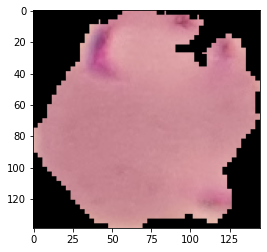

In [ ]:
plt.imshow(mpimg.imread(os.path.join('/content/drive/My Drive/malaria_blood_cells/cell_images/Parasitized/',train_parasite_images[10])))

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 32)        1

Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_gen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data_gen = data_gen.flow_from_directory('/content/drive/My Drive/malaria_blood_cells/cell_images',target_size=(300,300),batch_size=32,
                                              class_mode='binary',subset='training')

Found 22239 images belonging to 3 classes.


In [ ]:
validation_data_gen = data_gen.flow_from_directory('/content/drive/My Drive/malaria_blood_cells/cell_images/',target_size=(300,300),batch_size=32,
                                              class_mode='binary',subset='validation')

Found 0 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.optimizers import RMSprop,Adam

model.compile(loss='binary_crossentropy',
              # optimizer=RMSprop(lr=0.001),
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_data_gen,steps_per_epoch=100,
                              epochs=50)

Epoch 1/50
  3/100 [..............................] - ETA: 21:33 - loss: 0.6292 - accuracy: 0.6562

KeyboardInterrupt: ignored

# CNN-TF-Cats & Dogs

In [ ]:
# !pip install tensorflow==2.0.0-alpha0

In [ ]:
import tensorflow as tf
tf.__version__

In [ ]:
# !wget --no-check-certificate \
#   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
#   -O '/content/drive/My Drive/DogsCatsCnn/cats_and_dogs_filtered.zip'

In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt

In [ ]:
# local_zip = '/content/drive/My Drive/DogsCatsCnn/cats_and_dogs_filtered.zip'

In [ ]:
# zip_ref = zipfile.ZipFile(local_zip,'r')
# zip_ref.extractall('/content/drive/My Drive/DogsCatsCnn/cats_and_dogs_filtered')
# zip_ref.close()

In [ ]:
!cd /tmp/cats_and_dogs_filtered

In [ ]:
!ls

In [ ]:
base_dir = '/content/drive/My Drive/DogsCatsCnn/cats_and_dogs_filtered/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

In [ ]:
train_dir_cats = os.path.join(train_dir,'cats')
train_dir_dogs = os.path.join(train_dir,'dogs')

validation_dir_cats = os.path.join(validation_dir,'cats')
validation_dir_dogs = os.path.join(validation_dir,'dogs')

In [ ]:
train_dog_fname = os.listdir(train_dir_dogs)
train_cat_fname = os.listdir(train_dir_cats)

In [ ]:
valid_dog_fname = os.listdir(validation_dir_dogs)
valid_cat_fname = os.listdir(validation_dir_cats)

In [ ]:
print(f'Train dog images count {len(train_dog_fname)}')
print(f'Train cat images count {len(train_cat_fname)}')
print(f'valid dog images count {len(valid_dog_fname)}')
print(f'valid cat images count {len(valid_cat_fname)}')

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_dir_cats, fname) 
                for fname in train_cat_fname[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dir_dogs, fname) 
                for fname in train_dog_fname[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# !sudo mkdir '/content/drive/My Drive/DogsCatsCnn'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=40,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode='nearest',
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,shear_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255.,
                                  rotation_range=40,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode='nearest',
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,shear_range=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary') #class_mode ='binary',,save_to_dir='/tmp',save_format='png'
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

In [ ]:
history = model.fit(train_generator,steps_per_epoch=100,epochs=50,verbose=2,validation_data=validation_generator,validation_steps=50)

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

In [ ]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_dir_cats, f) for f in train_cat_fname]
dog_img_files = [os.path.join(train_dir_dogs, f) for f in train_dog_fname]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.title ('Training and validation loss'   )

# Transfer Learning

In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
base_dir = '/content/drive/My Drive/DogsCatsCnn/cats_and_dogs_filtered/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

In [ ]:
train_dir_cats = os.path.join(train_dir,'cats')
train_dir_dogs = os.path.join(train_dir,'dogs')

validation_dir_cats = os.path.join(validation_dir,'cats')
validation_dir_dogs = os.path.join(validation_dir,'dogs')

In [ ]:
train_dog_fname = os.listdir(train_dir_dogs)
train_cat_fname = os.listdir(train_dir_cats)

In [ ]:
valid_dog_fname = os.listdir(validation_dir_dogs)
valid_cat_fname = os.listdir(validation_dir_cats)

In [ ]:
print(f'Train dog images count {len(train_dog_fname)}')
print(f'Train cat images count {len(train_cat_fname)}')
print(f'valid dog images count {len(valid_dog_fname)}')
print(f'valid cat images count {len(valid_cat_fname)}')

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model.compile(optimizer=RMSprop(lr=0.0001),
              loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=40,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode='nearest',
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,shear_range=0.2)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

In [ ]:
history = model.fit(train_generator,steps_per_epoch=8,epochs=15,verbose=2,validation_data=validation_generator,validation_steps=8)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
local_weight_file='/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
pre_trained_model = InceptionV3(input_shape=(150,150,3),include_top= False,weights = None)

In [ ]:
pre_trained_model.load_weights(local_weight_file)

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
pre_trained_model.summary()

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print("Last layer output shape::",last_layer.output_shape)

In [ ]:
last_output = last_layer.output

In [ ]:
from tensorflow.keras.optimizers import RMSprop,Adam

In [ ]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024,activation= 'relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1,activation = 'sigmoid')(x)


model = Model(pre_trained_model.input,x)

model.compile(optimizer=RMSprop(lr = 0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,steps_per_epoch=100,epochs=20,verbose=2,validation_data=validation_generator,validation_steps=50)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# Sign CNN

In [ ]:
!sudo mkdir sign-language-mnist
!cd sign-language-mnist

In [ ]:
import os
# os.chdir('/content/sign-language-mnist')
# os.environ['KAGGLE_USERNAME'] = "karma12"
# os.environ['KAGGLE_KEY'] = "86e11f115781e9045f94c2b0ba1e31f4"

In [ ]:
!kaggle datasets download -d datamunge/sign-language-mnist

In [ ]:
import zipfile
local_zip  = 'sign-language-mnist.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/sign-language-mnist')

In [ ]:
import csv
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def get_data(filename):
  with open(filename) as training_file:
    csv_reader  = csv.reader(training_file,delimiter = ',')
    first_line = True
    temp_images = []
    temp_labels = []

    for row in csv_reader:
      if first_line:
        first_line = False
      else:
        temp_labels.append(row[0])
        images_data = row[1:785]
        images_data_as_array = np.array_split(images_data,28)
        temp_images.append(images_data_as_array)
    images = np.array(temp_images).astype('float')
    labels = np.array(temp_labels).astype('float')

    return images,labels

In [ ]:
training_images, training_labels = get_data('/content/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
testing_images, testing_labels = get_data('/content/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

In [ ]:
print(training_images.shape)

print(training_labels.shape)

In [ ]:
training_images = np.expand_dims(training_images,axis=3)
testing_images = np.expand_dims(testing_images,axis=3)

In [ ]:
print(training_images.shape)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=40,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode='nearest',
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,shear_range=0.2)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_generator = train_datagen.flow(training_images,training_labels,batch_size=32)
test_generator = test_datagen.flow(testing_images,testing_labels,batch_size=32)

In [ ]:
len(np.unique(testing_labels))

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
    
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
class myCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('acc')>0.90):
      print("ur reached 90% accuracy")
      self.model.stop_training = True

In [ ]:
callbacks = myCallBack()
history = model.fit(train_generator,validation_data=test_generator,epochs=50,
                    steps_per_epoch = len(training_images)/32,
                    validation_steps=len(testing_images)/32,
                    callbacks=[callbacks])

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
# Transfer learning
from tensorflow.keras.applications import VGG16

In [ ]:
from tensorflow.keras import layers,Model

In [ ]:
# Download VGG16 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /content/sign-language-mnist/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

In [ ]:
local_weights = '/content/sign-language-mnist/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
pre_trained_model = VGG16(input_shape = (150,150,3),include_top=False,weights=None)

In [ ]:
pre_trained_model.load_weights(local_weights)

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
pre_trained_model.summary()

In [ ]:
last_layer = pre_trained_model.get_layer('block4_pool')
print("Last layer output shape::",last_layer.output_shape)

In [ ]:
last_output = last_layer.output

In [ ]:
from tensorflow.keras.optimizers import Adam,RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024,activation= 'relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(24,activation = 'softmax')(x)


model = Model(pre_trained_model.input,x)

# model.compile(optimizer=RMSprop(lr = 0.0001),loss='binary_crossentropy',metrics=['accuracy'])
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
# history = model.fit(train_generator,steps_per_epoch=100,epochs=20,verbose=2,validation_data=validation_generator,validation_steps=50)
history = model.fit(train_generator,validation_data=test_generator,epochs=50,
                    steps_per_epoch = len(training_images)/32,
                    validation_steps=len(testing_images)/32)

# RockPapersScissors

In [ ]:
import os
import numpy as np
import pandas as pd
import zipfile

In [ ]:
# get training and testing data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

In [ ]:
local_zip = '/tmp/rps.zip'
train_rps_zip = zipfile.ZipFile(local_zip,'r')
train_rps_zip.extractall('/tmp')

In [ ]:
local_zip = '/tmp/rps-test-set.zip'
train_rps_zip = zipfile.ZipFile(local_zip,'r')
train_rps_zip.extractall('/tmp')

In [ ]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

In [ ]:
print("total images in rock folder",len(os.listdir(rock_dir)))
sample_rock = os.listdir(rock_dir)
sample_rock[:10]

In [ ]:
print("total images in paper folder",len(os.listdir(paper_dir)))
sample_paper = os.listdir(paper_dir)
sample_paper[:10]

In [ ]:
print("total images in scissors_dir folder",len(os.listdir(scissors_dir)))
sample_scissors= os.listdir(scissors_dir)
sample_scissors[:10]

In [ ]:
TRAINING_DIR = '/tmp/rps'
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale = 1/255.,
                                      horizontal_flip = True,
                                      vertical_flip = True,
                                      shear_range = 0.2,
                                      zoom_range = 0.2,
                                      rotation_range = 40,
                                      width_shift_range = 0.2,
                                      height_shift_range = 0.2,
                                      fill_mode = 'nearest'
)
VALIDATION_DIR = '/tmp/rps-test-set'
validation_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
train_generator = training_datagen.flow_from_directory(
                                                      TRAINING_DIR,
                                                      target_size=(150,150),
                                                      batch_size = 126,
                                                    class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory(
                                                      VALIDATION_DIR,
                                                      target_size=(150,150),
                                                      batch_size = 126,
                                                    class_mode = 'categorical')

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(3,activation = 'softmax')
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics= ['accuracy'])

In [ ]:
history = model.fit(train_generator,validation_data = validation_generator,
                    epochs = 50,steps_per_epoch = 20,verbose=2,
                    validation_steps=3)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

# Intel

In [ ]:
import os
os.chdir('/tmp')
os.environ['KAGGLE_USERNAME'] = "karma12"
os.environ['KAGGLE_KEY'] = "86e11f115781e9045f94c2b0ba1e31f4"

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

In [ ]:
# os.mkdir('/content/drive/My Drive/intel_images')

In [ ]:
# import zipfile
# file_dir = '/tmp/intel-image-classification.zip'
# file = zipfile.ZipFile(file_dir,'r')
# file.extractall('/content/drive/My Drive/intel_images')
# file.close()

In [ ]:
train_images = os.path.join('/content/drive/My Drive/intel_images/seg_train/seg_train')
test_images = os.path.join('/content/drive/My Drive/intel_images/seg_test/seg_test')

In [ ]:
os.listdir(train_images)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [ ]:
train_images_buildings  = os.path.join('/content/drive/My Drive/intel_images/seg_train/seg_train/buildings')
train_images_forest = os.path.join('/content/drive/My Drive/intel_images/seg_train/seg_train/forest')
train_images_glacier = os.path.join('/content/drive/My Drive/intel_images/seg_train/seg_train/glacier')
train_images_mountain = os.path.join('/content/drive/My Drive/intel_images/seg_train/seg_train/mountain')
train_images_sea = os.path.join('/content/drive/My Drive/intel_images/seg_train/seg_train/sea')
train_images_street = os.path.join('/content/drive/My Drive/intel_images/seg_train/seg_train/street')


test_images_buildings  = os.path.join('/content/drive/My Drive/intel_images/seg_test/seg_test/buildings')
test_images_forest = os.path.join('/content/drive/My Drive/intel_images/seg_test/seg_test/forest')
test_images_glacier = os.path.join('/content/drive/My Drive/intel_images/seg_test/seg_test/glacier')
test_images_mountain = os.path.join('/content/drive/My Drive/intel_images/seg_test/seg_test/mountain')
test_images_sea = os.path.join('/content/drive/My Drive/intel_images/seg_test/seg_test/sea')
test_images_street = os.path.join('/content/drive/My Drive/intel_images/seg_test/seg_test/street')

In [ ]:
train_build_fnames = os.listdir(train_images_buildings)
train_forest_fnames = os.listdir(train_images_forest)
train_glacier_fnames = os.listdir(train_images_glacier)
train_mountain_fnames = os.listdir(train_images_mountain)
train_sea_fnames = os.listdir(train_images_sea)
train_street_fnames = os.listdir(train_images_street)

test_build_fnames = os.listdir(test_images_buildings)
test_forest_fnames = os.listdir(test_images_forest)
test_glacier_fnames = os.listdir(test_images_glacier)
test_mountain_fnames = os.listdir(test_images_mountain)
test_sea_fnames = os.listdir(test_images_sea)
test_street_fnames = os.listdir(test_images_street)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
training_datagen = ImageDataGenerator(rescale = 1/255.,
                                      horizontal_flip = True,
                                      vertical_flip = True,
                                      shear_range = 0.2,
                                      zoom_range = 0.2,
                                      rotation_range = 40,
                                      width_shift_range = 0.2,
                                      height_shift_range = 0.2,
                                      fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
TRAINING_DIR = '/content/drive/My Drive/intel_images/seg_train/seg_train'
train_generator = training_datagen.flow_from_directory(
                                                      TRAINING_DIR,
                                                      target_size=(150,150),
                                                      batch_size = 126,
                                                    class_mode = 'categorical')

VALIDATION_DIR ='/content/drive/My Drive/intel_images/seg_test/seg_test'
validation_generator = validation_datagen.flow_from_directory(
                                                      VALIDATION_DIR,
                                                      target_size=(150,150),
                                                      batch_size = 126,
                                                    class_mode = 'categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 7

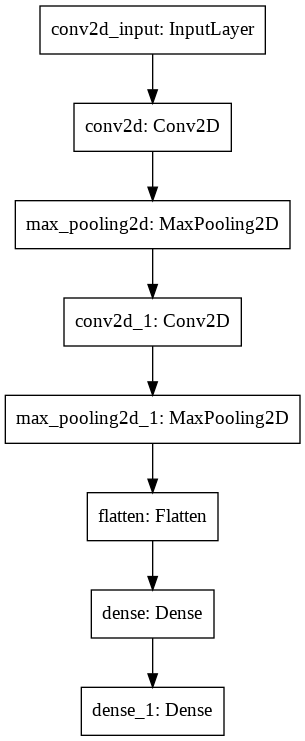

In [ ]:
plot_model(model)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics= ['accuracy'])

In [ ]:
history = model.fit(train_generator,validation_data = validation_generator,
                    epochs = 50,steps_per_epoch = 20,verbose=2,
                    validation_steps=3)

# OneShot

In [ ]:
!sudo mkdir '/content/drive/My Drive/siamese'
# !cd '/content/drive/My Drive/siamese'

In [ ]:
!pwd

In [ ]:
!git clone https://github.com/brendenlake/omniglot.git

In [ ]:
import os
import zipfile

source_dir = '/content/omniglot/python/images_background.zip'
file = zipfile.ZipFile(source_dir,'r')
file.extractall('/content/drive/My Drive/siamese')
file.close()

In [ ]:
source_dir = '/content/omniglot/python/images_evaluation.zip'
file = zipfile.ZipFile(source_dir,'r')
file.extractall('/content/drive/My Drive/siamese')
file.close()

In [ ]:
import numpy as np
import pandas as pd
# import scipy.misc
import imageio

In [ ]:
def loadimgs(path, n = 0):
  lang_dict= {}
  curry_n = n

  cat_dict = {}

  X = []
  y = []
  for alphabet in os.listdir(path):
    lang_dict[alphabet] = [curry_n,None]
    alphabet_path  = os.path.join(path,alphabet)

    for letter in os.listdir(alphabet_path):
      cat_dict[curry_n] = [alphabet,letter]
      category_names = []
      letter_path = os.path.join(alphabet_path,letter)
      for filename in os.listdir(letter_path):
        image_path = os.path.join(letter_path,filename)
        image = imageio.imread(image_path)
        category_names.append(image)
        y.append(curry_n)

      try:
        X.append(np.stack(category_names))
      except ValueError as e:
        print(e)
        print("error - category_images:", category_images)
      curry_n +=1
      lang_dict[alphabet][1] = curry_n - 1
    X = np.stack(X)
    y = np.vstack(y)

    return X,y,lang_dict


In [ ]:
Xtrain,y,train_classes = loadimgs('/content/drive/My Drive/siamese/images_background')

In [ ]:
Xval,yval,val_classes = loadimgs('/content/drive/My Drive/siamese/images_evaluation')

In [ ]:
def initialize_weights(shape,name =None,dtype=None):
  return np.random.normal(loc = 0.0,scale=1e-2,size=shape)

In [ ]:
def initialize_bias(shape, name = None,dtype=None):
  return np.random.normal(loc = 0.5,scale = 1e-2,size=shape)

In [ ]:
from keras.layers import Input,Conv2D,MaxPooling2D
from keras.models import Sequential
from keras.regularizers import l2
import tensorflow as tf
from keras.layers.core import Lambda, Flatten, Dense
from keras import backend as K
from keras.models import Model

In [ ]:
def get_siamese_model(input_shape):
    """
        Model architecture based on the one provided in: http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
    """
    
    # Define the tensors for the two input images
    left_input = Input(input_shape)
    right_input = Input(input_shape)
    
    # Convolutional Neural Network
    model = Sequential()
    model.add(Conv2D(64, (10,10), activation='relu', input_shape=input_shape,
                   kernel_initializer=initialize_weights, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (7,7), activation='relu',
                     kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (4,4), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(256, (4,4), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(Flatten())
    model.add(Dense(4096, activation='sigmoid',
                   kernel_regularizer=l2(1e-3),
                   kernel_initializer=initialize_weights,bias_initializer=initialize_bias))
    
    # Generate the encodings (feature vectors) for the two images
    encoded_l = model(left_input)
    encoded_r = model(right_input)
    
    # Add a customized layer to compute the absolute difference between the encodings
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])
    
    # Add a dense layer with a sigmoid unit to generate the similarity score
    prediction = Dense(1,activation='sigmoid',bias_initializer=initialize_bias)(L1_distance)
    
    # Connect the inputs with the outputs
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)
    
    # return the model
    return siamese_net

In [ ]:
model = get_siamese_model((105, 105, 1))
model.summary()

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
from keras.optimizers import Adam
optimizer = Adam(lr = 0.00006)
model.compile(loss="binary_crossentropy",optimizer=optimizer)

In [ ]:
import numpy.random as rng
import time
from sklearn.utils import shuffle

In [ ]:
def get_batch(batch_size,s="train"):
  if s=='train':
    X = Xtrain
    categories = train_classes
  else:
    X = Xval
    categories = val_classes
  n_classes, n_examples, w, h = X.shape
  categories = rng.choice(n_classes,size=(batch_size,)) #,replace=False
  pairs=[np.zeros((batch_size, h, w,1)) for i in range(2)]
  targets=np.zeros((batch_size,))
  targets[batch_size//2:] = 1
  for i in range(batch_size):
      category = categories[i]
      idx_1 = rng.randint(0, n_examples)
      pairs[0][i,:,:,:] = X[category, idx_1].reshape(w, h, 1)
      idx_2 = rng.randint(0, n_examples)
      
      # pick images of same class for 1st half, different for 2nd
      if i >= batch_size // 2:
          category_2 = category  
      else: 
          # add a random number to the category modulo n classes to ensure 2nd image has a different category
          category_2 = (category + rng.randint(1,n_classes)) % n_classes
      
      pairs[1][i,:,:,:] = X[category_2,idx_2].reshape(w, h,1)
  
  return pairs, targets  


In [ ]:
def generate(batch_size, s="train"):
    """a generator for batches, so model.fit_generator can be used. """
    while True:
        pairs, targets = get_batch(batch_size,s)
        yield (pairs, targets)

In [ ]:
def make_oneshot_task(N, s="val", language=None):
    """Create pairs of test image, support set for testing N way one-shot learning. """
    if s == 'train':
        X = Xtrain
        categories = train_classes
    else:
        X = Xval
        categories = val_classes
    n_classes, n_examples, w, h = X.shape
    
    indices = rng.randint(0, n_examples,size=(N,))
    if language is not None: # if language is specified, select characters for that language
        low, high = categories[language]
        if N > high - low:
            raise ValueError("This language ({}) has less than {} letters".format(language, N))
        categories = rng.choice(range(low,high),size=(N,))#,replace=False

    else: # if no language specified just pick a bunch of random letters
        categories = rng.choice(range(n_classes),size=(N,))#,replace=False            
    true_category = categories[0]
    ex1, ex2 = rng.choice(n_examples,size=(2,)) #replace=False,
    test_image = np.asarray([X[true_category,ex1,:,:]]*N).reshape(N, w, h,1)
    support_set = X[categories,indices,:,:]
    support_set[0,:,:] = X[true_category,ex2]
    support_set = support_set.reshape(N, w, h,1)
    targets = np.zeros((N,))
    targets[0] = 1
    targets, test_image, support_set = shuffle(targets, test_image, support_set)
    pairs = [test_image,support_set]

    return pairs, targets

In [ ]:
def test_oneshot(model, N, k, s = "val", verbose = 0):
    """Test average N way oneshot learning accuracy of a siamese neural net over k one-shot tasks"""
    n_correct = 0
    if verbose:
        print("Evaluating model on {} random {} way one-shot learning tasks ... \n".format(k,N))
    for i in range(k):
        inputs, targets = make_oneshot_task(N,s)
        probs = model.predict(inputs)
        if np.argmax(probs) == np.argmax(targets):
            n_correct+=1
    percent_correct = (100.0 * n_correct / k)
    if verbose:
        print("Got an average of {}% {} way one-shot learning accuracy \n".format(percent_correct,N))
    return percent_correct

In [ ]:
# Hyper parameters
evaluate_every = 200 # interval for evaluating on one-shot tasks
batch_size = 32
n_iter = 20000 # No. of training iterations
N_way = 20 # how many classes for testing one-shot tasks
n_val = 250 # how many one-shot tasks to validate on
best = -1

In [ ]:
model_path = '/content/drive/My Drive/siamese'
print("Starting training process!")
print("-------------------------------------")
t_start = time.time()
for i in range(1, n_iter+1):
    (inputs,targets) = get_batch(batch_size)
    loss = model.train_on_batch(inputs, targets)
    if i % evaluate_every == 0:
        print("\n ------------- \n")
        print("Time for {0} iterations: {1} mins".format(i, (time.time()-t_start)/60.0))
        print("Train Loss: {0}".format(loss)) 
        val_acc = test_oneshot(model, N_way, n_val, verbose=True)
        model.save_weights(os.path.join(model_path, 'weights.{}.h5'.format(i)))
        if val_acc >= best:
            print("Current best: {0}, previous best: {1}".format(val_acc, best))
            best = val_acc


# PDD

In [ ]:
!git clone https://github.com/Kaliostrogoblin/PDD.git

In [ ]:
import os
os.chdir('/content/PDD')

In [ ]:
from pdd.datasets.grape import load_data
train_data_path, test_data_path = load_data(split_on_train_test = True,random_state=13)

In [ ]:
os.listdir(test_data_path)

In [ ]:
from pdd.models import get_feature_extractor,make_siamese
import tensorflow as tf
import tensorflow.keras.backend as K

# sess = tf.Session()
# K.set_session(sess)

In [ ]:
input_shape =(256,256,3)
print("building feature extractor...")

feature_extractor = get_feature_extractor(input_shape)

print("constructing siamese network")
siams = make_siamese(feature_extractor,dist='l1',loss='cross_entropy')
siams.summary()

In [ ]:
from pdd.utils.training import SiameseBatchGenerator

In [ ]:
train_batch_gen = SiameseBatchGenerator.from_directory(dirname=train_data_path,augment= True)
test_batch_gen = SiameseBatchGenerator.from_directory(dirname=test_data_path)

def siams_generator(batch_gen, batch_size=None):
    while True:
        batch_xs, batch_ys = batch_gen.next_batch(batch_size)
        yield [batch_xs[0], batch_xs[1]], batch_ys

In [ ]:
siams.fit_generator(
    generator=siams_generator(train_batch_gen),
    steps_per_epoch=100,
    epochs=50,
    verbose=1,
    validation_data=siams_generator(test_batch_gen),
    validation_steps=30,
    shuffle=True
)

In [ ]:
print("Saving feature extractor...")
feature_extractor.save('/content/drive/My Drive/pdd_feature_extractor.h5')

In [ ]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
from pdd.models import TfKNN
from pdd.utils.data_utils import create_dataset_from_dir

In [ ]:
print("Loading feature extractor...")
feature_extractor = load_model("/content/drive/My Drive/pdd_feature_extractor.h5")

In [ ]:
print("Loading datasets...")
train_dataset = create_dataset_from_dir(train_data_path, shuffle=True)
test_dataset = create_dataset_from_dir(test_data_path, shuffle=True)

In [ ]:
sess = tf.Session()
tfknn = TfKNN(feature_extractor, 
              (train_dataset['data'], train_dataset['target']))

# Nlp-Sentiment

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
sentences = ['I love my dog','i love my cat','you love my dog!','Do you think my dog is amazing?']

In [ ]:
tokenizer = Tokenizer(num_words =100,oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)

In [ ]:
test_data = ['i really love my dog','my dog loves my manatee']

In [ ]:
test_seq = tokenizer.texts_to_sequences(test_data)
test_seq

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
padded = pad_sequences(sequences,padding='post',truncating='post',maxlen=5)
padded

In [ ]:
padded = pad_sequences(sequences,padding='post',maxlen=5)
padded

In [ ]:
import json
sentences =[]
urls = []
labels = []
# with open('/content/Sarcasm_Headlines_Dataset.json','r') as f:
#   ds = f.read()
# for item in ds:
#   sentences.append(item['headline'])
#   urls.append(item['article_link'])
#   labels.append(item['is_sarcastic'])


In [ ]:
import pandas as pd
datastore = pd.read_json('/content/Sarcasm_Headlines_Dataset.json', lines=True)
datastore

In [ ]:
sentences = []
for i in datastore['headline']:
  sentences.append(i)

In [ ]:
len(sentences)

In [ ]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
word_index

In [ ]:
len(word_index)

In [ ]:

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences,padding='post')

In [ ]:
padded[2]

In [ ]:
sentences[2]

In [ ]:
padded.shape

In [ ]:
import tensorflow
print(tensorflow.__version__)

In [ ]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews",with_info=True,as_supervised=True)

In [ ]:
train_data,test_data=imdb['train'],imdb['test']

In [ ]:
import numpy as np
train_sentences = []
train_labels = []
for k,v in train_data:
  train_sentences.append(str(k.numpy()))
  train_labels.append(v.numpy())
train_labels = np.array(train_labels)

In [ ]:
# train_sentences

In [ ]:
test_sentences = []
test_labels = []
for k,v in test_data:
  test_sentences.append(str(k.numpy()))
  test_labels.append(v.numpy())
test_labels = np.array(test_labels)

In [ ]:
len(train_sentences)

In [ ]:
oov_token = '<OOV>'
vocab_size = 10000
trunc_type ='post'
max_length = 120
embedding_dim = 16

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_token)
tokenizer.fit_on_texts(train_sentences)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences,maxlen=max_length,truncating=trunc_type)

In [ ]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences,maxlen=max_length,truncating=trunc_type)

In [ ]:
reversed_word_index = dict([(v,k)for k,v in word_index.items()])

In [ ]:
def decode_review(text):
  return ' '.join([reversed_word_index.get(i,'?') for i in text])

print(decode_review(train_padded[3]))
print(train_sentences[3])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics =['accuracy'])
model.summary()

In [ ]:
num_epochs = 10
model.fit(train_padded,train_labels,epochs=num_epochs,verbose=2,validation_data=(test_padded,test_labels))

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reversed_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

# http://projector.tensorflow.org/

In [ ]:
# Embedding on Sarcasm
sentences = []
for i in datastore['headline']:
  sentences.append(i)

labels = []
for i in datastore['is_sarcastic']:
  labels.append(i)

In [ ]:
len(sentences)

In [ ]:

vocab_size = 1000 #10000
embedding_dim = 32 # 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok ='<OOV>'
training_size = 20000

In [ ]:
train_sentences = sentences[0:training_size]
test_sentences = sentences[training_size:]

train_labels = np.array(labels[0:training_size])
test_labels = np.array(labels[training_size:])

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(train_sentences)
training_padded = pad_sequences(sequences=training_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(sequences=testing_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics =['accuracy'])
model.summary()

In [ ]:
num_epochs = 30
history = model.fit(training_padded,train_labels,epochs=num_epochs,verbose=2,validation_data=(testing_padded,test_labels))

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

plot_graphs(history,'accuracy')
plot_graphs(history,'loss')

In [ ]:
#### 
imdb, info = tfds.load("imdb_reviews/subwords8k",with_info=True,as_supervised=True)

In [ ]:
train_data = imdb['train']
test_data = imdb['test']

In [ ]:
tokenizer = info.features['text'].encoder

In [ ]:
print(tokenizer.subwords)

In [ ]:
sample_string = 'TensorFlow, from basic to mastery'
tokenized_string = tokenizer.encode(sample_string)
print(f'tokenized string is encode ---{tokenized_string}')

In [ ]:
original_string = tokenizer.decode(tokenized_string)
print(f'tokenized string is decode--- {original_string}')

In [ ]:
for st in tokenized_string:
  print(f'{st}-->{tokenizer.decode([st])}')

In [ ]:
# vocab_size = 1000 #10000
embedding_dim = 64 # 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok ='<OOV>'
training_size = 20000

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size,embedding_dim,input_length=max_length),
    # tf.keras.layers.Flatten(),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics =['accuracy'])
model.summary()

In [ ]:
num_epochs = 10
history = model.fit(train_data,epochs=num_epochs,verbose=2,validation_data=test_data)

# Single layer LSTM

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [ ]:
dataset,info = tfds.load('imdb_reviews/subwords8k',with_info=True,as_supervised = False)
train_dataset,test_dataset = dataset['train'],dataset['test']

In [ ]:
tokenizer = info.features['text'].encoder

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    # 1. tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    # 2. # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # 3. tf.keras.layers.Conv1D(128, 5, activation='relu'),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 1
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
plot_graphs(history, 'loss')

In [ ]:
tf.__version__

# LSTM--sarcasm

In [ ]:
import tensorflow as tf
import json

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


In [ ]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = '<OOV>'
training_size = 20000

In [ ]:
with open('/tmp/sarcasm.json','r') as f:
  datastore = json.load(f)

In [ ]:
sentences = []
labels = []
for row in datastore:
  sentences.append(row['headline'])
  labels.append(row['is_sarcastic'])

In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                            #  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Conv1D(128, 5, activation='relu'),
                             tf.keras.layers.GlobalMaxPooling1D(),
                             tf.keras.layers.Dense(24,activation = 'relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
history = model.fit(training_padded,training_labels,validation_data=(testing_padded,testing_labels),epochs=5,verbose=1)

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
print("Conv1D and Global MAxpooling")


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

# Text Classification

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv(r'/content/spam.csv',encoding='latin-1')

In [ ]:
data.head()

In [ ]:
data = data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [ ]:
data['v1'].value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
y = le.fit_transform(data['v1'])

In [ ]:
y = y.reshape(-1,1)

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data['v2'],y,test_size = 0.2)

In [ ]:
print(f'x train shape {X_train.shape}')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 1000
oov_token = '<OOV>'
max_length = 150
trunc = 'post'
padding_type = 'post'
embedding_dim = 50
tokenizer = Tokenizer(vocab_size,oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

In [ ]:
len(tokenizer.word_index)

In [ ]:
sequences = tokenizer.texts_to_sequences(X_train)
seq_pad = pad_sequences(sequences=sequences,maxlen=max_length,truncating=trunc,padding=padding_type)

In [ ]:
max([len(i) for i in sequences])

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                            #  tf.keras.layers.Conv1D(128, 5, activation='relu'),
                            #  tf.keras.layers.GlobalMaxPooling1D(),
                             tf.keras.layers.Dense(24,activation = 'relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics =['accuracy'])

In [ ]:
history = model.fit(seq_pad,y_train,epochs=10,validation_data=(test_sequences_matrix,y_test))

In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_length)

In [ ]:
accr = model.evaluate(test_sequences_matrix,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

# Text Generation

In [ ]:
data = []
with open('/content/poetry.txt','r') as txt:
  data.append(txt.read())

In [ ]:
data

["battered away till he hadn't a pound\nhis father he died and made him a man again\nleft a farm with ten acres of ground\nhe gave a grand party for friends a relations\nwho did not forget him when come to the will\nand if you'll but listen I'll make you're eyes glisten\nof rows and ructions at Lanigan's Ball\n\nMyself to be sure got free invitaions\nfor all the nice boys and girls I did ask\nin less than 10 minutes the friends and relations\nwere dancing as merry as bee 'round a cask\nThere was lashing of punch and wine for the ladies\npotatoes and cakes there was bacon a tay\nthere were the O'Shaughnessys, Murphys, Walshes, O'Gradys\ncourtin' the girls and dancing away\n\nthey were doing all kinds of nonsensical polkas\nall 'round the room in a whirly gig\nbut Julia and I soon banished their nonsense\nand tipped them a twist of a real Irish jig\nOh how that girl got mad on me\nand danced till you'd think the ceilings would fall\nfor I spent three weeks at Brook's academy\nlearning to

In [ ]:
corpus = data[0].lower().split('\n')

In [ ]:
tokenizer = Tokenizer() #oov_token='<OOV>'
tokenizer.fit_on_texts(corpus)

In [ ]:
total_words = len(tokenizer.word_index) +1
total_words

131

In [ ]:
input_sequences= []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(0,len(token_list)):
    n_gram_sequences = token_list[:i+1]
    input_sequences.append(n_gram_sequences)

In [ ]:
input_sequences

[[29],
 [29, 12],
 [29, 12, 13],
 [29, 12, 13, 6],
 [29, 12, 13, 6, 30],
 [29, 12, 13, 6, 30, 2],
 [29, 12, 13, 6, 30, 2, 31],
 [32],
 [32, 33],
 [32, 33, 6],
 [32, 33, 6, 34],
 [32, 33, 6, 34, 1],
 [32, 33, 6, 34, 1, 35],
 [32, 33, 6, 34, 1, 35, 14],
 [32, 33, 6, 34, 1, 35, 14, 2],
 [32, 33, 6, 34, 1, 35, 14, 2, 36],
 [32, 33, 6, 34, 1, 35, 14, 2, 36, 37],
 [38],
 [38, 2],
 [38, 2, 39],
 [38, 2, 39, 40],
 [38, 2, 39, 40, 41],
 [38, 2, 39, 40, 41, 42],
 [38, 2, 39, 40, 41, 42, 4],
 [38, 2, 39, 40, 41, 42, 4, 43],
 [6],
 [6, 44],
 [6, 44, 2],
 [6, 44, 2, 45],
 [6, 44, 2, 45, 46],
 [6, 44, 2, 45, 46, 5],
 [6, 44, 2, 45, 46, 5, 15],
 [6, 44, 2, 45, 46, 5, 15, 2],
 [6, 44, 2, 45, 46, 5, 15, 2, 16],
 [47],
 [47, 17],
 [47, 17, 48],
 [47, 17, 48, 49],
 [47, 17, 48, 49, 14],
 [47, 17, 48, 49, 14, 50],
 [47, 17, 48, 49, 14, 50, 51],
 [47, 17, 48, 49, 14, 50, 51, 7],
 [47, 17, 48, 49, 14, 50, 51, 7, 3],
 [47, 17, 48, 49, 14, 50, 51, 7, 3, 52],
 [1],
 [1, 53],
 [1, 53, 54],
 [1, 53, 54, 18],
 [1

In [ ]:
max_seq_len = max([len(x) for x in input_sequences])
max_seq_len

10

In [ ]:
import numpy as np
input_sequneces = np.array(pad_sequences(input_sequences,maxlen=max_seq_len,padding='pre'))

In [ ]:
input_sequneces[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, 29], dtype=int32)

In [ ]:
xs,label = input_sequneces[:,:-1], input_sequneces[:,-1]

In [ ]:
len(label)

193

In [ ]:
ys = tf.keras.utils.to_categorical(label,num_classes=total_words)

In [ ]:
print(tokenizer.word_index['in'])

24


In [ ]:
xs[6]

array([ 0,  0,  0, 29, 12, 13,  6, 30,  2], dtype=int32)

In [ ]:
ys[6]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
tokenizer.word_index

{"'round": 27,
 '10': 73,
 'a': 2,
 'academy': 127,
 'acres': 42,
 'again': 37,
 'all': 8,
 'and': 1,
 'as': 26,
 'ask': 70,
 'at': 19,
 'away': 12,
 'bacon': 84,
 'ball': 21,
 'banished': 101,
 'battered': 29,
 'be': 64,
 'bee': 76,
 'boys': 69,
 "brook's": 126,
 'but': 18,
 'cakes': 83,
 'cask': 77,
 'ceilings': 120,
 'chorus': 130,
 'come': 51,
 "courtin'": 90,
 'dance': 129,
 'danced': 117,
 'dancing': 25,
 'did': 17,
 'died': 34,
 'doing': 92,
 'eyes': 59,
 'fall': 122,
 'farm': 39,
 'father': 33,
 'for': 5,
 'forget': 49,
 'free': 66,
 'friends': 15,
 'gave': 44,
 'gig': 98,
 'girl': 113,
 'girls': 23,
 'glisten': 60,
 'got': 22,
 'grand': 45,
 'ground': 43,
 "hadn't": 30,
 'he': 6,
 'him': 14,
 'his': 32,
 'how': 111,
 'i': 9,
 "i'll": 56,
 'if': 53,
 'in': 24,
 'invitaions': 67,
 'irish': 108,
 'jig': 109,
 'julia': 99,
 'kinds': 93,
 'ladies': 81,
 "lanigan's": 20,
 'lashing': 78,
 'learning': 128,
 'left': 38,
 'less': 71,
 'listen': 55,
 'mad': 114,
 'made': 35,
 'make': 57,

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(total_words,64,input_length=max_seq_len-1),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                            #  tf.keras.layers.Conv1D(128, 5, activation='relu'),
                            #  tf.keras.layers.GlobalMaxPooling1D(),
                             tf.keras.layers.Dense(24,activation = 'relu'),
                             tf.keras.layers.Dense(total_words,activation='softmax')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 9, 64)             8384      
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 24)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 131)               3275      
Total params: 38,051
Trainable params: 38,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(xs,ys,epochs=500,verbose=2)

Epoch 1/500
7/7 - 0s - loss: 4.8759 - accuracy: 0.0104
Epoch 2/500
7/7 - 0s - loss: 4.8686 - accuracy: 0.0777
Epoch 3/500
7/7 - 0s - loss: 4.8631 - accuracy: 0.0777
Epoch 4/500
7/7 - 0s - loss: 4.8563 - accuracy: 0.0777
Epoch 5/500
7/7 - 0s - loss: 4.8477 - accuracy: 0.0829
Epoch 6/500
7/7 - 0s - loss: 4.8329 - accuracy: 0.0777
Epoch 7/500
7/7 - 0s - loss: 4.8094 - accuracy: 0.0725
Epoch 8/500
7/7 - 0s - loss: 4.7673 - accuracy: 0.0777
Epoch 9/500
7/7 - 0s - loss: 4.7076 - accuracy: 0.0570
Epoch 10/500
7/7 - 0s - loss: 4.6589 - accuracy: 0.0674
Epoch 11/500
7/7 - 0s - loss: 4.6190 - accuracy: 0.0829
Epoch 12/500
7/7 - 0s - loss: 4.5848 - accuracy: 0.0725
Epoch 13/500
7/7 - 0s - loss: 4.5525 - accuracy: 0.0829
Epoch 14/500
7/7 - 0s - loss: 4.5257 - accuracy: 0.0777
Epoch 15/500
7/7 - 0s - loss: 4.5045 - accuracy: 0.1036
Epoch 16/500
7/7 - 0s - loss: 4.4792 - accuracy: 0.0829
Epoch 17/500
7/7 - 0s - loss: 4.4436 - accuracy: 0.0829
Epoch 18/500
7/7 - 0s - loss: 4.4121 - accuracy: 0.0777
E

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.xlabel("epoch")
  plt.ylabel(string)
  plt.show()


In [ ]:
plot_graphs(history,"accuracy")

NameError: ignored

In [ ]:
seed_text = "battered away till"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list],maxlen=max_seq_len-1,padding='pre')
  predicted = model.predict_classes(token_list,verbose=1)
  output_word = ""
  for word,index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += "" + output_word
print(seed_text)


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

--2020-05-22 03:07:13--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 2607:f8b0:400c:c0b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-05-22 03:07:14 (103 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [ ]:
data = open('/tmp/sonnets.txt').read()

In [ ]:
corpus = data.lower().split('\n')

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

In [ ]:
total_words= len(tokenizer.word_index)+1

In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [ ]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [ ]:
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = tf.keras.utils.to_categorical(label, num_classes=total_words)

In [ ]:
from tensorflow.keras import regularizers
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(total_words,100,input_length=max_sequence_len-1),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150,return_sequences=True)),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.LSTM(100),
                             tf.keras.layers.Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
                             tf.keras.layers.Dense(total_words, activation='softmax')])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 1605)              162105    
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [ ]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 52s 107ms/step - loss: 6.9020 - accuracy: 0.0223
Epoch 2/100
484/484 [==============================] - 52s 107ms/step - loss: 6.4972 - accuracy: 0.0229
Epoch 3/100
484/484 [==============================] - 51s 106ms/step - loss: 6.3909 - accuracy: 0.0275
Epoch 4/100
484/484 [==============================] - 51s 106ms/step - loss: 6.2650 - accuracy: 0.0314
Epoch 5/100
484/484 [==============================] - 51s 106ms/step - loss: 6.1759 - accuracy: 0.0365
Epoch 6/100
484/484 [==============================] - 51s 106ms/step - loss: 6.0952 - accuracy: 0.0382
Epoch 7/100
484/484 [==============================] - 52s 107ms/step - loss: 6.0190 - accuracy: 0.0417
Epoch 8/100
484/484 [==============================] - 52s 107ms/step - loss: 5.9331 - accuracy: 0.0457
Epoch 9/100
484/484 [==============================] - 51s 105ms/step - loss: 5.8421 - accuracy: 0.0510
Epoch 10/100
484/484 [==============================] - 51s 105m

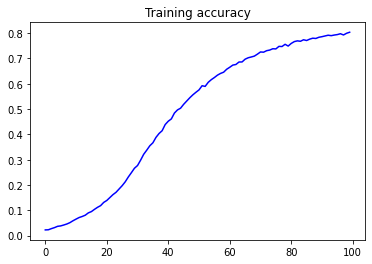

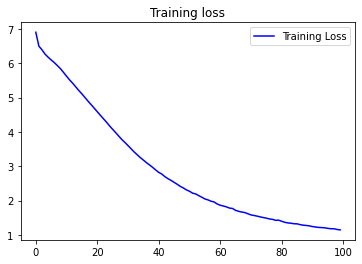

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope set him to mow back away his place away thee me so shown seen bring forth shame alone none seem before seem truth and make thine hue kings young men control thee in their way place alone find me hast her near forsworn to thee worms him see fullness bright bad back in doubt ye ye doth win his glory decrease forth compounds strange height 'tis decay decay torn torn decay another crime ride bow torn rage doth ride light light light forth forth ghastly night did scope in injury ' to go about up gems woe grow cold long


# Time series

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

In [ ]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5,shift=1,drop_remainder=True)
for windowset in dataset:
  for val in windowset:
    print(val.numpy(),end = " ")
  print()

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5,shift = 1,drop_remainder=True)
#
dataset = dataset.flat_map(lambda window:window.batch(5))
#
dataset = dataset.map(lambda window:(window[:-1],window[-1:]))
#
dataset = dataset.shuffle(buffer_size=10)
#
dataset = dataset.batch(2).prefetch(1)
# for window in dataset:
#   print(window.numpy())

for x,y in dataset:
  print("x = ",x.numpy())
  print("y = ",y.numpy())

x =  [[4 5 6 7]
 [2 3 4 5]]
y =  [[8]
 [6]]
x =  [[5 6 7 8]
 [1 2 3 4]]
y =  [[9]
 [5]]
x =  [[0 1 2 3]
 [3 4 5 6]]
y =  [[4]
 [7]]


In [ ]:
def windowed_dataset(series,window_size,batch_size,shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size+1,shift = 1,drop_remainder=True)
  dataset = dataset.flat_map(lambda window:window.batch(window_size+1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window:(window[:-1],window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)

  return dataset

In [ ]:
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

dataset = windowed_dataset(series,window_size,batch_size,shuffle_buffer_size)
l0 = tf.keras.layers.Dense(1,input_shape = [window_size])
model = tf.keras.models.Sequential([l0])

model.compile(loss='mse',optimizer = tf.keras.optimizers.SGD(lr =1e-6,momentum=0.9))
model.fit(dataset,epochs = 100,verbose = 2)

Epoch 1/100
46/46 - 0s - loss: 1150.7990
Epoch 2/100
46/46 - 0s - loss: 237.1634
Epoch 3/100
46/46 - 0s - loss: 155.0108
Epoch 4/100
46/46 - 0s - loss: 137.6553
Epoch 5/100
46/46 - 0s - loss: 121.3838
Epoch 6/100
46/46 - 0s - loss: 112.2165
Epoch 7/100
46/46 - 0s - loss: 104.7365
Epoch 8/100
46/46 - 0s - loss: 98.9529
Epoch 9/100
46/46 - 0s - loss: 93.7767
Epoch 10/100
46/46 - 0s - loss: 89.1632
Epoch 11/100
46/46 - 0s - loss: 93.1608
Epoch 12/100
46/46 - 0s - loss: 82.3952
Epoch 13/100
46/46 - 0s - loss: 81.1397
Epoch 14/100
46/46 - 0s - loss: 77.4343
Epoch 15/100
46/46 - 0s - loss: 77.5413
Epoch 16/100
46/46 - 0s - loss: 72.2297
Epoch 17/100
46/46 - 0s - loss: 69.8642
Epoch 18/100
46/46 - 0s - loss: 73.7306
Epoch 19/100
46/46 - 0s - loss: 67.9025
Epoch 20/100
46/46 - 0s - loss: 67.6060
Epoch 21/100
46/46 - 0s - loss: 64.5139
Epoch 22/100
46/46 - 0s - loss: 63.0565
Epoch 23/100
46/46 - 0s - loss: 63.9416
Epoch 24/100
46/46 - 0s - loss: 60.2301
Epoch 25/100
46/46 - 0s - loss: 59.2655
E

In [ ]:
print(f'layer weights {l0.get_weights()}')

layer weights [array([[ 0.01885327],
       [-0.06478272],
       [ 0.01010147],
       [ 0.01313338],
       [ 0.07613501],
       [-0.06929076],
       [-0.00577699],
       [ 0.02544632],
       [-0.00945606],
       [-0.01126758],
       [ 0.04405962],
       [-0.00239932],
       [-0.05823845],
       [ 0.03929992],
       [ 0.04711935],
       [ 0.04248326],
       [ 0.03939468],
       [ 0.18217975],
       [ 0.26964593],
       [ 0.42197567]], dtype=float32), array([0.0211358], dtype=float32)]


In [ ]:
len(series)

1461

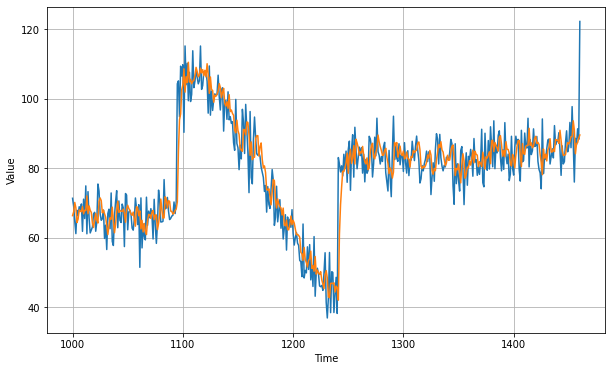

In [ ]:
forecast = []

for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

4.900249

In [ ]:
#############
dataset = windowed_dataset(x_train,window_size,batch_size,shuffle_buffer_size)

model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(10,input_shape=[window_size],activation = 'relu'),
      tf.keras.layers.Dense(10,activation='relu'),
      tf.keras.layers.Dense(1)

])

In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-8*10**(epoch/20))

In [ ]:
model.compile(loss='mse',optimizer=tf.keras.optimizers.SGD(lr=5e-5,momentum=0.9))
history= model.fit(dataset,epochs=200,verbose=2,callbacks = [lr_schedule])

Epoch 1/200
31/31 - 0s - loss: 4707.7520 - lr: 1.0000e-08
Epoch 2/200
31/31 - 0s - loss: 3678.5115 - lr: 1.1220e-08
Epoch 3/200
31/31 - 0s - loss: 2666.5715 - lr: 1.2589e-08
Epoch 4/200
31/31 - 0s - loss: 1852.3101 - lr: 1.4125e-08
Epoch 5/200
31/31 - 0s - loss: 1269.5581 - lr: 1.5849e-08
Epoch 6/200
31/31 - 0s - loss: 929.3815 - lr: 1.7783e-08
Epoch 7/200
31/31 - 0s - loss: 694.7313 - lr: 1.9953e-08
Epoch 8/200
31/31 - 0s - loss: 511.5547 - lr: 2.2387e-08
Epoch 9/200
31/31 - 0s - loss: 368.3912 - lr: 2.5119e-08
Epoch 10/200
31/31 - 0s - loss: 266.6427 - lr: 2.8184e-08
Epoch 11/200
31/31 - 0s - loss: 200.3077 - lr: 3.1623e-08
Epoch 12/200
31/31 - 0s - loss: 165.2534 - lr: 3.5481e-08
Epoch 13/200
31/31 - 0s - loss: 149.2415 - lr: 3.9811e-08
Epoch 14/200
31/31 - 0s - loss: 142.4086 - lr: 4.4668e-08
Epoch 15/200
31/31 - 0s - loss: 139.4722 - lr: 5.0119e-08
Epoch 16/200
31/31 - 0s - loss: 137.6677 - lr: 5.6234e-08
Epoch 17/200
31/31 - 0s - loss: 136.0134 - lr: 6.3096e-08
Epoch 18/200
31/31

ValueError: ignored

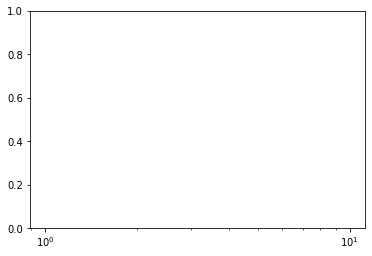

In [ ]:
lrs = 1e-8 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])

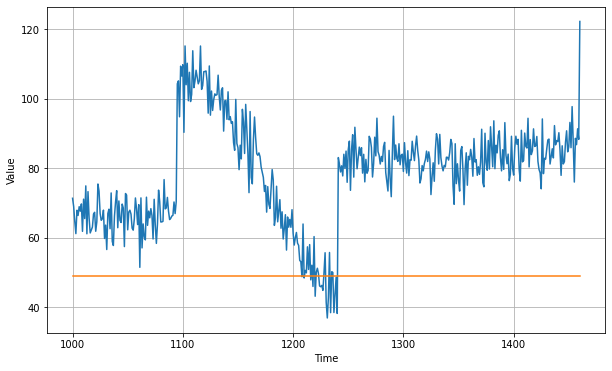

In [ ]:
forecast = []

for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

29.879322

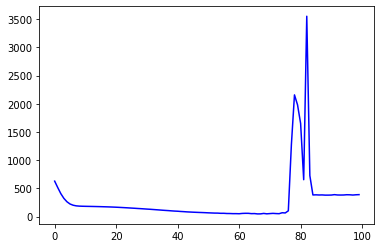

In [ ]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

[181.10928344726562, 180.08262634277344, 178.96023559570312, 177.7513885498047, 176.4224395751953, 174.98184204101562, 173.36126708984375, 171.64483642578125, 169.77841186523438, 167.6594696044922, 165.2558135986328, 162.49684143066406, 159.5115966796875, 156.4794921875, 153.29063415527344, 149.73609924316406, 146.46319580078125, 142.79322814941406, 139.53744506835938, 135.87156677246094, 132.07102966308594, 128.73257446289062, 124.71733856201172, 120.6044692993164, 116.59712982177734, 112.32601165771484, 108.43302917480469, 104.95863342285156, 100.57909393310547, 96.73759460449219, 94.11365509033203, 89.71614837646484, 86.52667999267578, 82.6328353881836, 79.8421859741211, 77.04293823242188, 74.75181579589844, 72.43903350830078, 70.4747314453125, 68.26338958740234, 65.4545669555664, 63.31864547729492, 61.104522705078125, 60.5661735534668, 56.99128341674805, 57.2425537109375, 53.79084014892578, 53.30108642578125, 51.200252532958984, 51.328125, 49.59700393676758, 55.01411819458008, 57.0

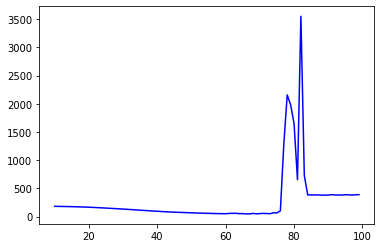

In [ ]:
# Plot all but the first 10
loss = history.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
print(plot_loss)
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

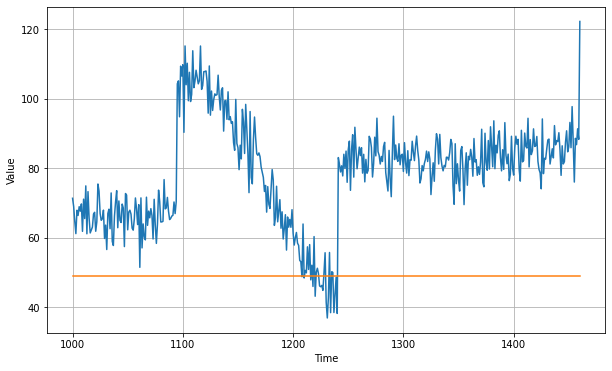

In [ ]:
forecast = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

5.3822327

# PyMaths

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import altair as alt
alt.themes.enable('dark')

ThemeRegistry.enable('dark')

In [ ]:
x = np.array([[1],[2],[3]])

In [ ]:
print(x)
print(x.shape)

[[1]
 [2]
 [3]]
(3, 1)


In [ ]:
# vector-vector addition
x =y = np.array([[1],[2],[3]])
print("x:::",x)
print("y:::",y)
print("x+y::\n",np.add(x,y))

x::: [[1]
 [2]
 [3]]
y::: [[1]
 [2]
 [3]]
x+y::
 [[2]
 [4]
 [6]]


In [ ]:
# scalar-vector multiplication
alpha = 2
x = np.array([[1],[2],[3]])
ax = alpha*x
print(ax)

[[2]
 [4]
 [6]]


In [ ]:
# linear combination
x, y = np.array([[2],[3]]), np.array([[4],[5]])
a, b = 2,3
z = a*x+b*y
print(z)

[[16]
 [21]]


In [ ]:
# VECTOR-VECTOR multiplication
x, y = np.array([[-2],[2]]), np.array([[4],[-3]])
print(x*y)
print("#"*10)
print(np.dot(x.T,y))
print("#"*10)
print((x.T @ y))

[[-8]
 [-6]]
##########
[[-14]]
##########
[[-14]]


In [ ]:
# Vector Norms
# Euclidean Norm
x = np.array([[3],[-4]])
Ec = np.linalg.norm(x,2)
print(f"Euclidean {Ec}")

mn = np.linalg.norm(x,1)
print(f"Manhatton {mn}")

inf = np.linalg.norm(x,np.inf)
print(f'max {inf}')

Euclidean 5.0
Manhatton 7.0
max 4.0


In [ ]:
# vector inner product, length,distance
x,y = np.array([[-2],[2]]), np.array([[4],[-3]])
x.T @ y

array([[-14]])

In [ ]:
distance = np.linalg.norm(x-y,2)
print(distance)

7.810249675906656


In [ ]:
x,y = np.array([[1],[2]]),np.array([[5],[7]])
cos_theta = (x.T @y)/(np.linalg.norm(x,2)*np.linalg.norm(y,2))
print(f"Cos theta:::{cos_theta}")

Cos theta:::[[0.98776297]]


In [ ]:
cos_inv = np.arccos(cos_theta)
print("angle in radians",np.round(cos_inv,3))


angle in radians [[0.157]]


In [ ]:
np.round(cos_inv*((180)/np.pi),3)

array([[8.973]])

In [ ]:
df = pd.DataFrame({"x1": [0, 2], "y1":[8, 3], "x2": [0.5, 2], "y2": [0, 3]})

In [ ]:
equation1 = alt.Chart(df).mark_line().encode(x="x1", y="y1")
equation2 = alt.Chart(df).mark_line(color="red").encode(x="x2", y="y2")
equation1 + equation2

alt.LayerChart(...)

In [ ]:
A = np.array([[1,2],[3,4]])
print(A)
print(f'Matrix shape ::{A.shape}')

[[1 2]
 [3 4]]
Matrix shape ::(2, 2)


In [ ]:
A = np.array([[0,1],[2,3]])
B = np.array([[5,6],[7,8]])

print(f'addition ::\n{A+B}')

print("#"*10)

print(f'Addition using numpy \n {np.add(A,B)}')

addition ::
[[ 5  7]
 [ 9 11]]
##########
Addition using numpy 
 [[ 5  7]
 [ 9 11]]


In [ ]:
# Matrix scalar multiplication
alpha = 2
C = np.array([[1,2],[3,4]])
print(f'Multiplication using numpy \n {np.multiply(alpha,C)}')

Multiplication using numpy 
 [[2 4]
 [6 8]]


In [ ]:
# matrix vector multiplication
A = np.array([[0,2],[1,4]])
v = np.array([[1],[2]])

print(f'Multiplication vector and matrix \n{np.dot(A,v)}')

print(f'withot dot. \n{A @ v}')


Multiplication vector and matrix 
[[4]
 [9]]
withot dot. 
[[4]
 [9]]


In [ ]:
A = np.array([[1,2,1],[4,4,5],[6,7,7]])
A_i = np.linalg.inv(A)
print(f"Inverse matrix:: \n{A_i}")

Inverse matrix:: 
[[-7. -7.  6.]
 [ 2.  1. -1.]
 [ 4.  5. -4.]]


In [ ]:
I = np.round(np.dot(A_i,A))
I

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [ 0., -0.,  1.]])

In [ ]:
# Solving systems of linear equations with Matrices
# Gaussian Elimination
A = np.array([[1,3,5],[2,2,-1],[1,3,2]])
y = np.array([[-1],[1],[2]])

W=np.linalg.solve(A,y)
print(W)

[[-2.]
 [ 2.]
 [-1.]]


In [ ]:
# NumPy does not have a method to obtain the row echelon form of a matrix. But, we can use Sympy, a Python library for symbolic mathematics that counts with a module for Matrices operations.SymPy has a method to obtain the reduced row echelon form and the pivots, rref.
from sympy import Matrix

In [ ]:
A = Matrix([[1,0,1],[0,1,0]])
A_rref, A_pivots = A.rref()
print(f"Reduced form of A is:: \n{A_rref}")
print(f"Pivots of A is ::{A_pivots}")

Reduced form of A is:: 
Matrix([[1, 0, 1], [0, 1, 0]])
Pivots of A is ::(0, 1)


In [ ]:
B = Matrix([[1,2,1],[4,4,5],[6,7,7]])
B_rref, B_pivots = B.rref()
print(f"Reduced form of B is:: \n{B_rref}")
print(f"Pivots of B is ::{B_pivots}")

Reduced form of B is:: 
Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
Pivots of B is ::(0, 1, 2)


In [ ]:
C= Matrix([[1, 2, 3, -1],
            [2, -1, -4, 8],
            [-1, 1, 3, -5],
            [-1, 2, 5, -6],
            [-1, -2, -3, 1]])
C_rref, C_pivots = C.rref()
print(f"Reduced form of B is:: \n{C_rref}")
print(f"Pivots of B is ::{C_pivots}")

Reduced form of B is:: 
Matrix([[1, 0, -1, 0], [0, 1, 2, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0]])
Pivots of B is ::(0, 1, 3)


In [ ]:
# Froboneious Norm
A = np.array([[1, 2, 3],
              [4, 5, 6], 
              [7, 8, 9]])
np.linalg.norm(A,'fro')

16.881943016134134

In [ ]:
# Max Norm or Infinite Norm
A = np.array([[1, 2, 3],
              [4, 5, 6], 
              [7, 8, 9]])
np.linalg.norm(A,np.inf)

24.0

In [ ]:
# Spectral Norm
A = np.array([[1, 2, 3],
              [4, 5, 6], 
              [7, 8, 9]])
np.linalg.norm(A,2)

16.84810335261421

In [ ]:
# Linear Mappings
x = np.array([[-1],
              [0],
              [1]])

y = np.array([[-3],
              [0],
              [2]])

T = np.array([[-1,0,0],
              [0,-1,0],
              [0,0,-1]])

In [ ]:
left_side1 = T @(x + y)
right_side1 = T@x+T@y
print("Left side result''\n",left_side1)
print("Right side result''\n",right_side1)

Left side result''
 [[ 4]
 [ 0]
 [-3]]
Right side result''
 [[ 4]
 [ 0]
 [-3]]


In [ ]:
alpha = 2
leftside2 = T@(alpha*x)
right_side2 =alpha*(T@x)
print("Left side result''\n",leftside2)
print("Right side result''\n",right_side2)

Left side result''
 [[ 2]
 [ 0]
 [-2]]
Right side result''
 [[ 2]
 [ 0]
 [-2]]


In [ ]:
# Reversal Matrix
x = np.array([[-1],
              [0],
              [1]])

y = np.array([[-3],
              [0],
              [2]])

T = np.array([[0,0,1],
              [0,1,0],
              [1,0,0]])

In [ ]:
x_rev = T @x
y_rev = T@y
left_side3 = T @(x+y)
right_side3 = T@x + T@y

print(f"x is {x} \n reversal is {x_rev}")
print(f"x is {y} \n reversal is {y_rev}")

print(f"Left side result = right side result \n {left_side3}=={right_side3}")

x is [[-1]
 [ 0]
 [ 1]] 
 reversal is [[ 1]
 [ 0]
 [-1]]
x is [[-3]
 [ 0]
 [ 2]] 
 reversal is [[ 2]
 [ 0]
 [-3]]
Left side result = right side result 
 [[ 3]
 [ 0]
 [-4]]==[[ 3]
 [ 0]
 [-4]]


In [ ]:
alpha = 2
left_side_2 = T @ (alpha * x)
right_side_2 = alpha * (T @ x)
print(f"Left side of the equation:\n{left_side_2}")
print(f"Right side of the equation:\n{right_side_2}")

Left side of the equation:
[[ 2]
 [ 0]
 [-2]]
Right side of the equation:
[[ 2]
 [ 0]
 [-2]]


In [ ]:
# Linear Mappings
# Scaling
# y = Ax

A = np.array([[2.0, 0],
              [0, 2.0]])

x = np.array([[0, 2.0,],
              [0, 4.0,]])

y = A @ x

In [ ]:
z = np.column_stack((y,x))
df = pd.DataFrame({"dim-1":z[0],"dim-2":z[1],'type': ['tran', 'tran', 'base', 'base']})
df

,dim-1,dim-2,type
0,0.0,0.0,tran
1,4.0,8.0,tran
2,0.0,0.0,base
3,2.0,4.0,base


In [ ]:
chart = alt.Chart(df).mark_line(opacity =0.8).encode(x = 'dim-1',y = 'dim-2',color='type',strokeDash= 'type')
chart

alt.Chart(...)

In [ ]:
# Reflection
# rotation along the horiontal axis
A1 = np.array([[1.0, 0],
               [0, -1.0]])

# rotation along the vertical axis
A2 = np.array([[-1.0, 0],
               [0, 1.0]])

# rotation along the line at 45 degrees from the origin
A3 = np.array([[0, 1.0],
               [1.0, 0]])

# rotation along the line at -45 degrees from the origin
A4 = np.array([[0, -1.0],
               [-1.0, 0]])

x = np.array([[0, 2.0,],
              [0, 4.0,]])

In [ ]:
y1 = A1@x
y2 = A2@x
y3 = A3@x
y4 = A4@x

z = np.column_stack((x,y1,y2,y3,y4))
df = pd.DataFrame({"dim-1":z[0],"dim-2":z[1],'reflection': ['original', 'original',
                                  '0-degrees', '0-degrees',
                                  '90-degrees', '90-degrees', 
                                  '45-degrees', '45-degrees', 
                                  'neg-45-degrees', 'neg-45-degrees']})
df

,dim-1,dim-2,reflection
0,0.0,0.0,original
1,2.0,4.0,original
2,0.0,0.0,0-degrees
3,2.0,-4.0,0-degrees
4,0.0,0.0,90-degrees
5,-2.0,4.0,90-degrees
6,0.0,0.0,45-degrees
7,4.0,2.0,45-degrees
8,0.0,0.0,neg-45-degrees
9,-4.0,-2.0,neg-45-degrees


In [ ]:
def base_coor(ran1: float, ran2: float):
    '''return base chart with coordinate space'''
    df_base = pd.DataFrame({'horizontal': np.linspace(ran1, ran2, num=2), 'vertical': np.zeros(2)})

    h = alt.Chart(df_base).mark_line(color='white').encode(
        x='horizontal',
        y='vertical')
    v = alt.Chart(df_base).mark_line(color='white').encode(
        y='horizontal',
        x='vertical')
    base = h + v

    return base

In [ ]:
chart = alt.Chart(df).mark_line().encode(
    x=alt.X('dim-1', axis=alt.Axis(title='horizontal-axis')),
    y=alt.Y('dim-2', axis=alt.Axis(title='vertical-axis')),
    color='reflection')
base_coor(-5.0, 5.0) + chart

alt.LayerChart(...)

In [ ]:
# shear
# shear along the horiontal axis
A1 = np.array([[1.0, 1.5],
               [0, 1.0]])

x = np.array([[0, 2.0,],
              [0, 4.0,]])

u = np.array([[2, 4.0,],
              [0, 4.0,]])

y1 = A1@x
y2 = A1@u

z  = np.column_stack((x,y1,u,y2))

In [ ]:
df = pd.DataFrame({'dim-1': z[0], 'dim-2':z[1],
                   'shear': ['original', 'original',
                             'horizontal', 'horizontal',
                             'original-2', 'original-2',
                             'horizontal-2', 'horizontal-2'
                            ]})

In [ ]:
chart = alt.Chart(df).mark_line().encode(
    x = alt.X('dim-1',axis=alt.Axis(title='horizontal-axis')),
    y= alt.Y('dim-2',axis=alt.Axis(title='vertical-axis')),
    color='shear'
)

base_coor(-10.0, 10.0) + chart

alt.LayerChart(...)

In [ ]:
# Rotation
# 90-degrees roration 
A1 = np.array([[0, -1.0],
               [1, 0]])

# 180-degrees roration 
A2 = np.array([[-1.0, 0],
               [0, -1.0]])

# 270-degrees roration 
A3 = np.array([[0, 1.0],
               [-1.0, 0]])

x = np.array([[0, 2.0,],
              [0, 4.0,]])

In [ ]:
y1 = A1@x
y2 = A2@x
y3 = A3@x

z = np.column_stack((x,y1,y2,y3))

df = pd.DataFrame({'dim-1': z[0], 'dim-2':z[1],
                   'rotation': ['original', 'original',
                             '90-degrees', '90-degrees',
                             '180-degrees', '180-degrees',
                             '270-degrees', '270-degrees'
                            ]})
df

,dim-1,dim-2,rotation
0,0.0,0.0,original
1,2.0,4.0,original
2,0.0,0.0,90-degrees
3,-4.0,2.0,90-degrees
4,0.0,0.0,180-degrees
5,-2.0,-4.0,180-degrees
6,0.0,0.0,270-degrees
7,4.0,-2.0,270-degrees


In [ ]:
chart = alt.Chart(df).mark_line().encode(
    x=alt.X('dim-1', axis=alt.Axis(title='horizontal-axis')),
    y=alt.Y('dim-2', axis=alt.Axis(title='vertical-axis')),
    color='rotation')

base_coor(-5.0, 5.0) + chart

alt.LayerChart(...)

In [ ]:
# base vector
y = np.array([[3],
              [2]])

x = np.array([[1],
              [3]])

P = (y @ y.T)/(y.T @ y)

In [ ]:
print(f"Projection of P \n {P}")

Projection of P 
 [[0.69230769 0.46153846]
 [0.46153846 0.30769231]]


In [ ]:
z = P @ x
print("Projection x onto Y \n",z)

Projection x onto Y 
 [[2.07692308]
 [1.38461538]]


In [ ]:
# origin coordinate space
o = np.array([[0],
              [0]])

In [ ]:
v = np.column_stack((o,x,o,y,o,z,x,z))
df = pd.DataFrame({'dim-1': v[0], 'dim-2':v[1],
                   'vector': ['x-vector', 'x-vector',
                              'y-base-vector', 'y-base-vector',
                              'z-projection', 'z-projection',
                              'orthogonal-vector', 'orthogonal-vector'],
                  'size-line': [2, 2, 2, 2, 4, 4, 2, 2]})

In [ ]:
df

,dim-1,dim-2,vector,size-line
0,0.000000,0.000000,x-vector,2
1,1.000000,3.000000,x-vector,2
2,0.000000,0.000000,y-base-vector,2
3,3.000000,2.000000,y-base-vector,2
4,0.000000,0.000000,z-projection,4
5,2.076923,1.384615,z-projection,4
6,1.000000,3.000000,orthogonal-vector,2
7,2.076923,1.384615,orthogonal-vector,2


In [ ]:
chart = alt.Chart(df).mark_line().encode(
    x=alt.X('dim-1', axis=alt.Axis(title='horizontal-axis')),
    y=alt.Y('dim-2', axis=alt.Axis(title='vertical-axis')),
    color='vector', 
    strokeDash='vector',
    size = 'size-line')

base_coor(-1.0, 4.0) + chart

alt.LayerChart(...)

In [ ]:
# LU decomposition
A = np.array([[1, 3, 5],
              [2, 2, -1],
              [1, 3, 2]])
l1 = np.array([[1, 0, 0],
               [-2, 1, 0],
               [0, 0, 1]])

l1@A

array([[  1,   3,   5],
       [  0,  -4, -11],
       [  1,   3,   2]])

In [ ]:
from scipy.linalg import lu
A = np.array([[2, 1, 1, 0],
              [4, 3, 3, 1],
              [8, 7, 9, 5],
              [6, 7, 9, 8]])

In [ ]:
p,l,u =lu(A)

In [ ]:
print(f'Pivot values \n {p}')

Pivot values 
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [ ]:
print(f'lower traingle matrix is \n {np.round(l,2)}')

lower traingle matrix is 
 [[ 1.    0.    0.    0.  ]
 [ 0.75  1.    0.    0.  ]
 [ 0.5  -0.29  1.    0.  ]
 [ 0.25 -0.43  0.33  1.  ]]


In [ ]:
print(f'upper traingle matrix is \n {np.round(u,2)}')

upper traingle matrix is 
 [[ 8.    7.    9.    5.  ]
 [ 0.    1.75  2.25  4.25]
 [ 0.    0.   -0.86 -0.29]
 [ 0.    0.    0.    0.67]]


In [ ]:
# A= PLU
A_recover = np.round(p@l@u,1)
A_recover

array([[2., 1., 1., 0.],
       [4., 3., 3., 1.],
       [8., 7., 9., 5.],
       [6., 7., 9., 8.]])

In [ ]:
# QR decomposition
x, y = np.array([[3],[4],[0]]), np.array([[-4],[3],[2]])

# euclidean norm of x and y
x_norm = np.linalg.norm(x,2)
y_norm = np.linalg.norm(y,2)

# normalized x or unit vector

x_unit = x*(1/x_norm)
y_unit = y*(1/y_norm)

In [ ]:
print(f'Euclidean norm of x:\n {x_norm}')
print(f'Euclidean norm of y:\n {y_norm}')

Euclidean norm of x:
 5.0
Euclidean norm of y:
 5.385164807134504


In [ ]:
print(f'Normalized x: \n {x_unit}')
print(f'Normalized y: \n {y_unit}')

Normalized x: 
 [[0.6]
 [0.8]
 [0. ]]
Normalized y: 
 [[-0.74278135]
 [ 0.55708601]
 [ 0.37139068]]


In [ ]:
# We can confirm that the Euclidean norm of the normalized versions of x^ and y^ equals 1 

print(f'Euclidean norm of normalized x :: \n {np.linalg.norm(x_unit,2)}')
print(f'Euclidean norm of normalized y :: \n {np.round(np.linalg.norm(y_unit,2),2)}')

Euclidean norm of normalized x :: 
 1.0
Euclidean norm of normalized y :: 
 1.0


In [ ]:
print(f'Inner product normalized vectors:\n{np.round(x_unit.T @ y_unit,1)}\n')
print(f'Inner product normalized x with itself:\n{np.round(x_unit.T @ x_unit,1)}\n') 
print(f'Inner product normalized y with itself:\n{np.round(y_unit.T @ y_unit,1)}') 

Inner product normalized vectors:
[[-0.]]

Inner product normalized x with itself:
[[1.]]

Inner product normalized y with itself:
[[1.]]


In [ ]:
Q = np.column_stack((x_unit, y_unit))
print(f'Orthonormal matrix Q:\n{Q}')

Orthonormal matrix Q:
[[ 0.6        -0.74278135]
 [ 0.8         0.55708601]
 [ 0.          0.37139068]]


In [ ]:
np.round(Q.T @ Q,1)

array([[ 1., -0.],
       [-0.,  1.]])

In [ ]:
pwd

'/content'

In [ ]:
%%writefile test.txt
testing magic files

Writing test.txt


In [ ]:
f = open('/content/test.txt')
f.read()

'testing magic files'

In [ ]:
f.seek(0)
f.read()

'testing magic files'

In [ ]:
A = np.array([[4, 2],
              [1, 3]])
eig_val,eig_vec = np.linalg.eig(A)
print(f"Eigen values {eig_val}")
print(f'Eigen Vecors {eig_vec}')

Eigen values [5. 2.]
Eigen Vecors [[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


In [ ]:
B = np.array([[0, -1],
              [1, 0]])

values, vectors = np.linalg.eig(B)
print(values)
print(vectors)

[0.+1.j 0.-1.j]
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


In [ ]:
A = np.array([[5,  3, 0],
              [2,  6, 0], 
              [4,  -2, 2]])
eig_val,eig_vec = np.linalg.eig(A)
print(f'Eigen values {eig_val}')
print(f'Eigen vectors {eig_vec}')

Eigen values [2. 8. 3.]
Eigen vectors [[ 0.          0.6882472   0.18291323]
 [ 0.          0.6882472  -0.12194215]
 [ 1.          0.22941573  0.97553722]]


In [ ]:
X = eig_vec
I = np.identity(3)
L = I*eig_val

In [ ]:
# AX = XL
print(f'left side equation \n {A@X}')
print(f'right side equation \n {X@L}')

left side equation 
 [[ 0.          5.50597761  0.54873968]
 [ 0.          5.50597761 -0.36582646]
 [ 2.          1.83532587  2.92661165]]
right side equation 
 [[ 0.          5.50597761  0.54873968]
 [ 0.          5.50597761 -0.36582646]
 [ 2.          1.83532587  2.92661165]]


In [ ]:
# verify equality
print(f'Entrywise comaprison ---{np.allclose(A@X,X@L)}')

Entrywise comaprison ---True


In [ ]:
X_inv = np.linalg.inv(X)

print(f'Original matrix A:\n{A}\n')
print(f'Reconstruction of A with Eigen Decomposition of A:\n{X @ L @ X_inv}')

Original matrix A:
[[ 5  3  0]
 [ 2  6  0]
 [ 4 -2  2]]

Reconstruction of A with Eigen Decomposition of A:
[[ 5.  3.  0.]
 [ 2.  6.  0.]
 [ 4. -2.  2.]]


In [ ]:
x = np.arange(12)
print(x)
print(x.shape)
print(x.reshape(3,4))
print(x.reshape(-1,4))

[ 0  1  2  3  4  5  6  7  8  9 10 11]
(12,)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [ ]:
#tensors
x = np.arange(24).reshape(2,3,4)
print(x)
print(x.shape)
print(x.sum())
print(x.mean())
print('*'*20)
print(x.sum()/x.size)


[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
(2, 3, 4)
276
11.5
********************
11.5


In [ ]:
print(x)
sum_a = x.sum(axis=0
              ,keepdims=True)
sum_a

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


array([[[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]]])

In [ ]:
u = np.array([3,-4])
np.linalg.norm(u,1)

7.0

# Calculus Python

In [ ]:
# Gradient Descent in python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
%matplotlib inline

In [ ]:
w = np.linspace(1.0,5.0,100)
alpha = 0.01

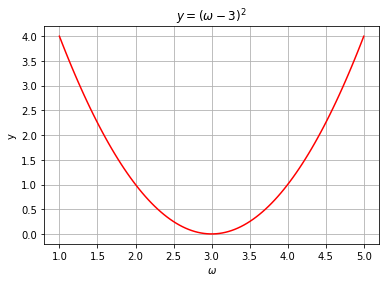

In [ ]:
y = np.power((w-3),2)
plt.plot(w,y,'r')
plt.title(r'$y=(\omega-3)^2 $')
plt.xlabel(r'$\omega$')
plt.ylabel('y')
plt.grid();

In [ ]:
def f(w):
  return (w-3)**2

In [ ]:
dw = derivative(f,w)
J = w- alpha * dw

In [ ]:
alpha = 0.4
cur_w = 1
N = 200
w_list = [1]
fw_list = [4]

for i  in range(N):
  prev_w = cur_w
  cur_w += -alpha*derivative(f,prev_w)
  w_list.append(cur_w)
  fw_list.append(np.power((cur_w-3),2))
print("The local minimum occurs at: %.1f" % cur_w)

The local minimum occurs at: 3.0


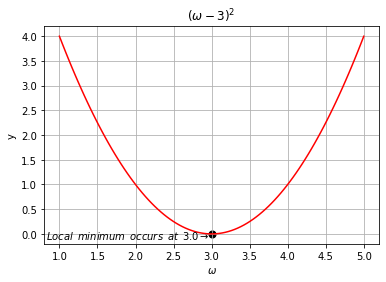

In [ ]:
plt.scatter(cur_w, y = np.power((cur_w-3),2) , c='k', s=50)
plt.plot(w,y,'r')
plt.title(r'$(\omega-3)^2 $')
plt.xlabel(r'$\omega$')
plt.ylabel('y')
plt.text(0.78,-0.1,r' $ Local\enspace minimum\enspace occurs\enspace at\enspace 3.0  \rightarrow $')
plt.grid();

In [ ]:
from sympy import *

In [ ]:
x, y, z = symbols('x y z')

In [ ]:
diff(cos(x),x)

-sin(x)

In [ ]:
diff(x**4,x)

4*x**3

In [ ]:
diff(exp(x**2), x)

2*x*exp(x**2)

In [ ]:
diff(x**4,x,x)

12*x**2

In [ ]:
dv = Derivative(x**4,x)
print(dv)

Derivative(x**4, x)


In [ ]:
integrate(cos(x),x)

sin(x)

In [ ]:
limit(sin(x)/x,x,0)

1

In [ ]:
expr = exp(sin(x))
expr.series(x, 0, 4)

1 + x + x**2/2 + O(x**4)

# Keras book

In [ ]:
from keras.datasets import reuters

Using TensorFlow backend.


In [ ]:
(train_data,train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire = ''.join([reverse_word_index.get(i -3,'?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] =1.
  return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels),dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

In [ ]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:

# build models
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64,activation ='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='tanh'))
# model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=6, batch_size=256, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/6
7982/7982 [==============================] - 1s 165us/step - loss: 2.0835 - accuracy: 0.5901 - val_loss: 1.3938 - val_accuracy: 0.6740
Epoch 2/6
7982/7982 [==============================] - 1s 130us/step - loss: 1.0975 - accuracy: 0.7656 - val_loss: 1.0869 - val_accuracy: 0.7700
Epoch 3/6
7982/7982 [==============================] - 1s 130us/step - loss: 0.7791 - accuracy: 0.8411 - val_loss: 0.9412 - val_accuracy: 0.8120
Epoch 4/6
7982/7982 [==============================] - 1s 132us/step - loss: 0.5758 - accuracy: 0.8829 - val_loss: 0.8704 - val_accuracy: 0.8270
Epoch 5/6
7982/7982 [==============================] - 1s 131us/step - loss: 0.4347 - accuracy: 0.9174 - val_loss: 0.8460 - val_accuracy: 0.8230
Epoch 6/6
7982/7982 [==============================] - 1s 131us/step - loss: 0.3300 - accuracy: 0.9345 - val_loss: 0.8811 - val_accuracy: 0.8100


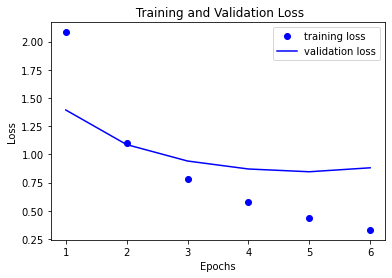

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title(' Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

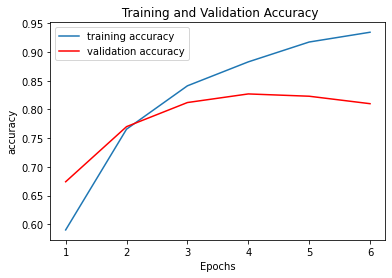

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, label = 'training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'validation accuracy')
plt.title(' Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()